In [354]:
#We load in the specific data needed
import polars as pl
import numpy as np
import os
from pathlib import Path
import pandas as pd
from datetime import date
import datetime
import hvplot.polars
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import bisplrep, bisplev
from datetime import timedelta
from patsy import dmatrix
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


# data = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/standardized_features_tech.parquet"
# test_data = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/standardized_features_test_tech.parquet"

#Non standardized data
# data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/total_dataset_tech.parquet1')
# data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/standardized_features_tech.parquet')
data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_tech_nonscaled.parquet')
# datat = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/standardized_features_test_tech.parquet')
# datat = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/total_dataset_tech_org.parquet')
datat = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_test_tech_nonscaled.parquet')
firm_data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Firm_variables/daily_firm_data_median_new.parquet')
# data_index = data.groupby([ 'Ticker', 'date', 'cp_flag']).mean().replace(np.nan, 0)
columns_todrop =firm_data.columns[2:]
columnstodrop_ex = ['const',
 'moneyness',
 'prev2_day_iv',
 'prev_day_iv',
 'trading_days_till_exp',
 '5_day_rolling_return_stock',
 'PRC',
 'PRC_actual',
 'RET',
 'RETX',
 'cumulative_return',
 'daily_return_indicator_stock',
 'vol_stock',
 '10Y_RIR',
 '1Y_bond',
 '2Y_bond',
 'CLOSE_vix',
 'FF_rate',
 'OPEN_vix',
 'gold_price',
 'reces_indi']
datat.drop(columns=columns_todrop, inplace=True, errors='ignore')
data.drop(columns=columns_todrop, inplace=True, errors='ignore')
# data_stadardized.drop(columns=columnstodrop_ex, inplace=True, errors='ignore')
# datat.drop(columns=columnstodrop_ex, inplace=True, errors='ignore')
datat.drop(columns=[ 'T'], inplace=True)
data.drop(columns=[ 'T'], inplace=True)
# datat = datat[datat['trading_days_till_exp'] <= 5]

test_data = datat[datat['date'] >= '2021-01-01']
# testdata = testdata.drop(columns=columns_to_drop)
total_train = data[data['date'] < '2021-01-01']
# test_data.drop(columns=[ 'trading_days_till_exp', 'lag_trading_days'])
# total_train.drop(columns=[ 'lag_trading_days'], inplace=True)
# data = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/total_dataset_tech.parquet"
# test_data = pd.read_parquet(test_data)
# total_train = pd.read_parquet(data)
# total_train = total_train[total_train['date'] < '2021-01-01']
# total_train['tau'] = total_train['lag_trading_days'] / 252
# test_data['tau'] = test_data['lag_trading_days'] / 252

# train = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/train_data_tech.parquet"
# validation = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Standardized_data/validate_data_tech.parquet"

# # Write the DataFrame to a CSV file
# train = pd.read_parquet(train)
# validation = pd.read_parquet(validation)
# total_train = pd.concat([train, validation])

# total_train = total_train.reset_index()

# test_data = test_data[test_data["Ticker"] != "TSLA"]

In [355]:
total_train

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0            P   AAPL 2019-01-02                      2     -1.860   
1            P   AAPL 2019-01-02                      2     -1.682   
2            P   AAPL 2019-01-02                      2     -1.505   
3            P   AAPL 2019-01-02                      2     -1.330   
4            P   AAPL 2019-01-02                      2     -0.895   
...        ...    ...        ...                    ...        ...   
145306       C   TSLA 2020-12-31                      5      1.467   
145307       C   TSLA 2020-12-31                      5      1.535   
145308       C   TSLA 2020-12-31                      5      1.670   
145309       C   TSLA 2020-12-31                      5      1.804   
145310       C   TSLA 2020-12-31                      5      1.936   

        impl_volatility  prev_day_iv  prev2_day_iv   BIDLO      ASKHI  ...  \
0              0.558181     0.505761      0.000000  154.55  158.52000  ...   
1              0.541292     0.495051      0.000000  154.55  158.52000  ...   
2              0.525111     0.484170      0.000000  154.55  158.52000  ...   
3              0.507597     0.473299      0.000000  154.55  158.52000  ...   
4              0.468786     0.455607      0.000000  154.55  158.52000  ...   
...                 ...          ...           ...     ...        ...  ...   
145306         0.623205     0.554273      0.486818  655.00  669.90002  ...   
145307         0.629719     0.554273      0.486818  655.00  669.90002  ...   
145308         0.639880     0.584788      0.511182  655.00  669.90002  ...   
145309         0.648805     0.601543      0.523462  655.00  669.90002  ...   
145310         0.659719     0.619541      0.537101  655.00  669.90002  ...   

        gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  HIGH_vix  \
0       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
1       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
2       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
3       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
4       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
...            ...         ...      ...      ...      ...       ...       ...   
145306  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145307  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145308  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145309  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145310  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   

        LOW_vix  CLOSE_vix  spread_vix  
0         28.57      28.57        3.17  
1         28.57      28.57        3.17  
2         28.57      28.57        3.17  
3         28.57      28.57        3.17  
4         28.57      28.57        3.17  
...         ...        ...         ...  
145306    20.56      21.31        1.26  
145307    20.56      21.31        1.26  
145308    20.56      21.31        1.26  
145309    20.56      21.31        1.26  
145310    20.56      21.31        1.26  

[145311 rows x 128 columns]

In [356]:
test_data

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0            C   AAPL 2021-01-04                      4     -2.411   
1            C   AAPL 2021-01-04                      4     -2.265   
2            C   AAPL 2021-01-04                      4     -2.120   
3            C   AAPL 2021-01-04                      4     -1.977   
4            C   AAPL 2021-01-04                      4     -1.835   
...        ...    ...        ...                    ...        ...   
123307       P   TSLA 2021-12-30                      1      2.062   
123308       P   TSLA 2021-12-30                      1      2.161   
123309       P   TSLA 2021-12-30                      1      2.261   
123310       P   TSLA 2021-12-30                      1      2.360   
123311       P   TSLA 2021-12-30                      1      2.458   

        impl_volatility  prev_day_iv  prev2_day_iv       BIDLO       ASKHI  \
0              0.599475     0.605595      0.327228   133.39999   135.99001   
1              0.610254     0.605595      0.327228   133.39999   135.99001   
2              0.570884     0.605595      0.327228   133.39999   135.99001   
3              0.566679     0.605595      0.327228   133.39999   135.99001   
4              0.525325     0.448299      0.559822   133.39999   135.99001   
...                 ...          ...           ...         ...         ...   
123307         1.012930     0.753005      0.932566  1078.42004  1118.99988   
123308         1.047433     0.753005      0.932566  1078.42004  1118.99988   
123309         1.088575     0.753005      0.932566  1078.42004  1118.99988   
123310         1.129544     0.753005      0.932566  1078.42004  1118.99988   
123311         1.133852     0.753005      0.932566  1078.42004  1118.99988   

        ...  gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  \
0       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
1       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
2       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
3       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
4       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
...     ...         ...         ...      ...      ...      ...       ...   
123307  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123308  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123309  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123310  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123311  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   

        HIGH_vix  LOW_vix  CLOSE_vix  spread_vix  
0          22.49    20.57      21.20        1.92  
1          22.49    20.57      21.20        1.92  
2          22.49    20.57      21.20        1.92  
3          22.49    20.57      21.20        1.92  
4          22.49    20.57      21.20        1.92  
...          ...      ...        ...         ...  
123307     14.60    12.56      12.85        2.04  
123308     14.60    12.56      12.85        2.04  
123309     14.60    12.56      12.85        2.04  
123310     14.60    12.56      12.85        2.04  
123311     14.60    12.56      12.85        2.04  

[123312 rows x 128 columns]

In [357]:
total_train.sort_values(by=['date', 'Ticker'], inplace=True)
total_train

unique_tickers = total_train['Ticker'].unique()

# Display the unique tickers
for ticker in unique_tickers:
    print(ticker)

AAPL
AMZN
META
MSFT
NVDA
TSLA


In [358]:
# Assuming total_train and test_data are your DataFrames

# Get the columns of test_data
total_train_columns = total_train.columns

# Filter total_train to keep only the columns that are present in test_data
test_data_filtered = test_data[total_train_columns]

# Display the first 5 rows of the filtered total_train to verify the change
test_data_filtered.head(5)

test_data = test_data_filtered 

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_97912/3526068584.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


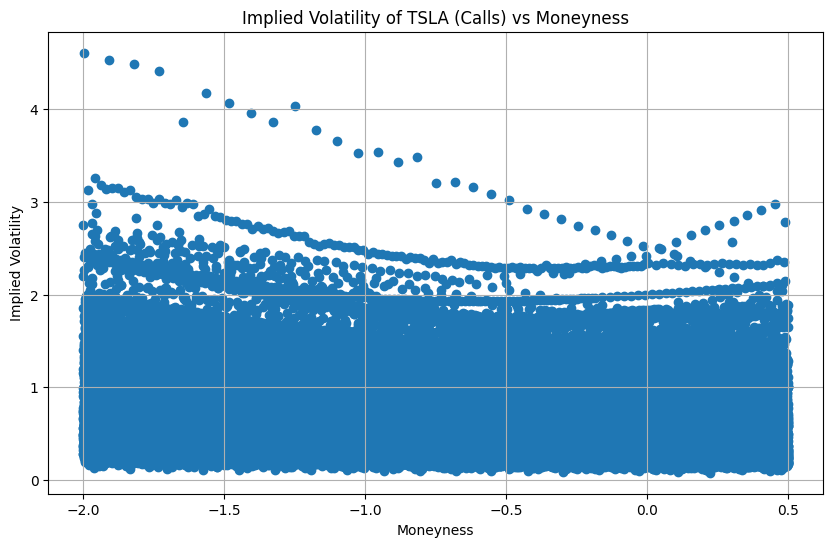

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0           P   AAPL 2019-01-02                      2     -1.860   
5680        P   AMZN 2019-01-02                      2     -0.969   
5681        P   AMZN 2019-01-02                      2     -0.933   
5682        P   AMZN 2019-01-02                      2     -0.896   
5683        P   AMZN 2019-01-02                      2     -0.859   
...       ...    ...        ...                    ...        ...   
36627       P   AMZN 2020-12-31                      5     -1.329   
36626       P   AMZN 2020-12-31                      5     -1.369   
36625       P   AMZN 2020-12-31                      5     -1.409   
36638       P   AMZN 2020-12-31                      5     -0.894   
72963       P   TSLA 2020-12-31                      5      0.463   

       impl_volatility  prev_day_iv  prev2_day_iv      BIDLO       ASKHI  ...  \
0             0.558181     0.505761      0.000000   154.5500   158.52000  ...   
5680          0.572448     0.540134      0.000000  1449.0000  1513.46997  ...   
5681          0.565794     0.535766      0.000000  1449.0000  1513.46997  ...   
5682          0.560965     0.535766      0.000000  1449.0000  1513.46997  ...   
5683          0.556127     0.535766      0.000000  1449.0000  1513.46997  ...   
...                ...          ...           ...        ...         ...  ...   
36627         0.285779     0.232543      0.359476  3281.2229  3350.64990  ...   
36626         0.287541     0.237991      0.372028  3281.2229  3350.64990  ...   
36625         0.289261     0.237991      0.372028  3281.2229  3350.64990  ...   
36638         0.267753     0.213460      0.317064  3281.2229  3350.64990  ...   
72963         0.573017     0.521592      0.435413   655.0000   669.90002  ...   

       gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  HIGH_vix  \
0      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
5680   449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
5681   449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
5682   449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
5683   449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
...           ...         ...      ...      ...      ...       ...       ...   
36627  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
36626  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
36625  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
36638  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72963  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   

       LOW_vix  CLOSE_vix  spread_vix  
0        28.57      28.57        3.17  
5680     28.57      28.57        3.17  
5681     28.57      28.57        3.17  
5682     28.57      28.57        3.17  
5683     28.57      28.57        3.17  
...        ...        ...         ...  
36627    20.56      21.31        1.26  
36626    20.56      21.31        1.26  
36625    20.56      21.31        1.26  
36638    20.56      21.31        1.26  
72963    20.56      21.31        1.26  

[72964 rows x 128 columns]

In [359]:
import matplotlib.pyplot as plt
import pandas as pd

df = data

# Filter the DataFrame based on the given conditions
filtered_df = df[
                 (df['cp_flag'] == 'P')  
                #  (df['moneyness'] <= 2) &
                  ]
                #  (df['date'] >= '2019-01-07') &
                #  (df['trading_days_till_exp'] == 1)]

# Ensure the date column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Sort the DataFrame by date
filtered_df = filtered_df.sort_values(by='date')

# Plot impl_volatility against moneyness
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['moneyness'], filtered_df['impl_volatility'], marker='o')
plt.xlabel('Moneyness')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility of TSLA (Calls) vs Moneyness')
plt.grid(True)
plt.show()

filtered_df

In [360]:
total_train

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0            P   AAPL 2019-01-02                      2     -1.860   
1            P   AAPL 2019-01-02                      2     -1.682   
2            P   AAPL 2019-01-02                      2     -1.505   
3            P   AAPL 2019-01-02                      2     -1.330   
4            P   AAPL 2019-01-02                      2     -0.895   
...        ...    ...        ...                    ...        ...   
145306       C   TSLA 2020-12-31                      5      1.467   
145307       C   TSLA 2020-12-31                      5      1.535   
145308       C   TSLA 2020-12-31                      5      1.670   
145309       C   TSLA 2020-12-31                      5      1.804   
145310       C   TSLA 2020-12-31                      5      1.936   

        impl_volatility  prev_day_iv  prev2_day_iv   BIDLO      ASKHI  ...  \
0              0.558181     0.505761      0.000000  154.55  158.52000  ...   
1              0.541292     0.495051      0.000000  154.55  158.52000  ...   
2              0.525111     0.484170      0.000000  154.55  158.52000  ...   
3              0.507597     0.473299      0.000000  154.55  158.52000  ...   
4              0.468786     0.455607      0.000000  154.55  158.52000  ...   
...                 ...          ...           ...     ...        ...  ...   
145306         0.623205     0.554273      0.486818  655.00  669.90002  ...   
145307         0.629719     0.554273      0.486818  655.00  669.90002  ...   
145308         0.639880     0.584788      0.511182  655.00  669.90002  ...   
145309         0.648805     0.601543      0.523462  655.00  669.90002  ...   
145310         0.659719     0.619541      0.537101  655.00  669.90002  ...   

        gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  HIGH_vix  \
0       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
1       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
2       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
3       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
4       449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
...            ...         ...      ...      ...      ...       ...       ...   
145306  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145307  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145308  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145309  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
145310  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   

        LOW_vix  CLOSE_vix  spread_vix  
0         28.57      28.57        3.17  
1         28.57      28.57        3.17  
2         28.57      28.57        3.17  
3         28.57      28.57        3.17  
4         28.57      28.57        3.17  
...         ...        ...         ...  
145306    20.56      21.31        1.26  
145307    20.56      21.31        1.26  
145308    20.56      21.31        1.26  
145309    20.56      21.31        1.26  
145310    20.56      21.31        1.26  

[145311 rows x 128 columns]

In [361]:
# Create filter for only short maturity (τ≤5)
# total_train = total_train[total_train["maturity_group"] == "τ≤5"]

# total_train = total_train[total_train['Ticker'] == 'AAPL']
# total_train = total_train[total_train['trading_days_till_exp'] <= 4]
# test_data = test_data[test_data['Ticker'] == 'AAPl']
# test_data = test_data[test_data['trading_days_till_exp'] <= 4]


In [362]:
if 'moneyness' in total_train.columns:
    print("Column 'moneyness' exists in the DataFrame.")
else:
    print("Column 'moneyness' does not exist in the DataFrame.")

Column 'moneyness' exists in the DataFrame.


In [363]:
test_data

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0            C   AAPL 2021-01-04                      4     -2.411   
1            C   AAPL 2021-01-04                      4     -2.265   
2            C   AAPL 2021-01-04                      4     -2.120   
3            C   AAPL 2021-01-04                      4     -1.977   
4            C   AAPL 2021-01-04                      4     -1.835   
...        ...    ...        ...                    ...        ...   
123307       P   TSLA 2021-12-30                      1      2.062   
123308       P   TSLA 2021-12-30                      1      2.161   
123309       P   TSLA 2021-12-30                      1      2.261   
123310       P   TSLA 2021-12-30                      1      2.360   
123311       P   TSLA 2021-12-30                      1      2.458   

        impl_volatility  prev_day_iv  prev2_day_iv       BIDLO       ASKHI  \
0              0.599475     0.605595      0.327228   133.39999   135.99001   
1              0.610254     0.605595      0.327228   133.39999   135.99001   
2              0.570884     0.605595      0.327228   133.39999   135.99001   
3              0.566679     0.605595      0.327228   133.39999   135.99001   
4              0.525325     0.448299      0.559822   133.39999   135.99001   
...                 ...          ...           ...         ...         ...   
123307         1.012930     0.753005      0.932566  1078.42004  1118.99988   
123308         1.047433     0.753005      0.932566  1078.42004  1118.99988   
123309         1.088575     0.753005      0.932566  1078.42004  1118.99988   
123310         1.129544     0.753005      0.932566  1078.42004  1118.99988   
123311         1.133852     0.753005      0.932566  1078.42004  1118.99988   

        ...  gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  \
0       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
1       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
2       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
3       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
4       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
...     ...         ...         ...      ...      ...      ...       ...   
123307  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123308  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123309  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123310  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123311  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   

        HIGH_vix  LOW_vix  CLOSE_vix  spread_vix  
0          22.49    20.57      21.20        1.92  
1          22.49    20.57      21.20        1.92  
2          22.49    20.57      21.20        1.92  
3          22.49    20.57      21.20        1.92  
4          22.49    20.57      21.20        1.92  
...          ...      ...        ...         ...  
123307     14.60    12.56      12.85        2.04  
123308     14.60    12.56      12.85        2.04  
123309     14.60    12.56      12.85        2.04  
123310     14.60    12.56      12.85        2.04  
123311     14.60    12.56      12.85        2.04  

[123312 rows x 128 columns]

In [364]:
test_data

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0            C   AAPL 2021-01-04                      4     -2.411   
1            C   AAPL 2021-01-04                      4     -2.265   
2            C   AAPL 2021-01-04                      4     -2.120   
3            C   AAPL 2021-01-04                      4     -1.977   
4            C   AAPL 2021-01-04                      4     -1.835   
...        ...    ...        ...                    ...        ...   
123307       P   TSLA 2021-12-30                      1      2.062   
123308       P   TSLA 2021-12-30                      1      2.161   
123309       P   TSLA 2021-12-30                      1      2.261   
123310       P   TSLA 2021-12-30                      1      2.360   
123311       P   TSLA 2021-12-30                      1      2.458   

        impl_volatility  prev_day_iv  prev2_day_iv       BIDLO       ASKHI  \
0              0.599475     0.605595      0.327228   133.39999   135.99001   
1              0.610254     0.605595      0.327228   133.39999   135.99001   
2              0.570884     0.605595      0.327228   133.39999   135.99001   
3              0.566679     0.605595      0.327228   133.39999   135.99001   
4              0.525325     0.448299      0.559822   133.39999   135.99001   
...                 ...          ...           ...         ...         ...   
123307         1.012930     0.753005      0.932566  1078.42004  1118.99988   
123308         1.047433     0.753005      0.932566  1078.42004  1118.99988   
123309         1.088575     0.753005      0.932566  1078.42004  1118.99988   
123310         1.129544     0.753005      0.932566  1078.42004  1118.99988   
123311         1.133852     0.753005      0.932566  1078.42004  1118.99988   

        ...  gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  \
0       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
1       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
2       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
3       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
4       ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
...     ...         ...         ...      ...      ...      ...       ...   
123307  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123308  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123309  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123310  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123311  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   

        HIGH_vix  LOW_vix  CLOSE_vix  spread_vix  
0          22.49    20.57      21.20        1.92  
1          22.49    20.57      21.20        1.92  
2          22.49    20.57      21.20        1.92  
3          22.49    20.57      21.20        1.92  
4          22.49    20.57      21.20        1.92  
...          ...      ...        ...         ...  
123307     14.60    12.56      12.85        2.04  
123308     14.60    12.56      12.85        2.04  
123309     14.60    12.56      12.85        2.04  
123310     14.60    12.56      12.85        2.04  
123311     14.60    12.56      12.85        2.04  

[123312 rows x 128 columns]

In [365]:
# Print the rows where 'moneyness' is equal to 1.1
# print(test_data[test_data['moneyness'] >= 0.05])

# Create the additional collumns and add select only the specific

In [366]:
puts_data_all = total_train[total_train['cp_flag'] == 'P']
puts_data_test = test_data[test_data['cp_flag'] == 'P']
puts_data_all

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0           P   AAPL 2019-01-02                      2     -1.860   
1           P   AAPL 2019-01-02                      2     -1.682   
2           P   AAPL 2019-01-02                      2     -1.505   
3           P   AAPL 2019-01-02                      2     -1.330   
4           P   AAPL 2019-01-02                      2     -0.895   
...       ...    ...        ...                    ...        ...   
72959       P   TSLA 2020-12-31                      5      0.236   
72960       P   TSLA 2020-12-31                      5      0.274   
72961       P   TSLA 2020-12-31                      5      0.312   
72962       P   TSLA 2020-12-31                      5      0.388   
72963       P   TSLA 2020-12-31                      5      0.463   

       impl_volatility  prev_day_iv  prev2_day_iv   BIDLO      ASKHI  ...  \
0             0.558181     0.505761      0.000000  154.55  158.52000  ...   
1             0.541292     0.495051      0.000000  154.55  158.52000  ...   
2             0.525111     0.484170      0.000000  154.55  158.52000  ...   
3             0.507597     0.473299      0.000000  154.55  158.52000  ...   
4             0.468786     0.455607      0.000000  154.55  158.52000  ...   
...                ...          ...           ...     ...        ...  ...   
72959         0.573773     0.557458      0.432122  655.00  669.90002  ...   
72960         0.573565     0.543927      0.431956  655.00  669.90002  ...   
72961         0.572960     0.543927      0.431956  655.00  669.90002  ...   
72962         0.573072     0.531722      0.432987  655.00  669.90002  ...   
72963         0.573017     0.521592      0.435413  655.00  669.90002  ...   

       gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  HIGH_vix  \
0      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
1      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
2      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
3      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
4      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
...           ...         ...      ...      ...      ...       ...       ...   
72959  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72960  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72961  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72962  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72963  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   

       LOW_vix  CLOSE_vix  spread_vix  
0        28.57      28.57        3.17  
1        28.57      28.57        3.17  
2        28.57      28.57        3.17  
3        28.57      28.57        3.17  
4        28.57      28.57        3.17  
...        ...        ...         ...  
72959    20.56      21.31        1.26  
72960    20.56      21.31        1.26  
72961    20.56      21.31        1.26  
72962    20.56      21.31        1.26  
72963    20.56      21.31        1.26  

[72964 rows x 128 columns]

# Total moneyness of -0.5 to 2 for calls

In [367]:
# puts_data_all = puts_data_all[puts_data_all['moneyness'] < -0.5]
# puts_data_test = puts_data_test[puts_data_test['moneyness'] < -0.5]

In [368]:
# puts_iv_neg = puts_data_all[puts_data_all['impl_volatility'] <= 0]
# puts_iv_pos = puts_data_all[puts_data_all['impl_volatility'] > 0]
# puts_iv_pos

In [369]:
# # Ensure 'impl_volatility' is in the 4th position
# columns = list(puts_data_all.columns)
# if 'impl_volatility' in columns:
#     columns.remove('impl_volatility')
#     columns.insert(4, 'impl_volatility')  # Insert 'impl_volatility' at the 4th position (index 3)

# # Reorder the DataFrame columns
# puts_data_all = puts_data_all[columns]

# # Sort the DataFrame by 'impl_volatility'
# puts_data_all.sort_values(by=['impl_volatility'], inplace=True)

# # puts_data_all[puts_data_all['moneyness'] <= -0.05]

# puts_data_all

In [370]:
# # Ensure 'impl_volatility' is in the 4th position
# columns = list(puts_data_test.columns)
# if 'impl_volatility' in columns:
#     columns.remove('impl_volatility')
#     columns.insert(4, 'impl_volatility')  # Insert 'impl_volatility' at the 4th position (index 3)

# # Reorder the DataFrame columns
# puts_data_test = puts_data_test[columns]

# # Sort the DataFrame by 'impl_volatility'
# puts_data_test.sort_values(by=['impl_volatility'], inplace=True)

# puts_data_test

In [371]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Split into training and test sets
# train_data = puts_data_all
# test_data = puts_data_test

# # Separate target variable
# y_train = train_data['trading_days_till_exp']
# y_test = test_data['trading_days_till_exp']

# # Plot histogram of implied volatility for training and test sets
# plt.figure(figsize=(12, 6))
# sns.histplot(y_train, color='blue', kde=True, label='Train Set')
# sns.histplot(y_test, color='orange', kde=True, label='Test Set')
# plt.title('Distribution of Implied Volatility: Train vs Test Set')
# plt.xlabel('Implied Volatility')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

# # Plot box plot of implied volatility for training and test sets
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=[y_train, y_test], palette=['blue', 'orange'])
# plt.title('Box Plot of Implied Volatility: Train vs Test Set')
# plt.xlabel('Dataset')
# plt.ylabel('Implied Volatility')
# plt.xticks([0, 1], ['Train Set', 'Test Set'])
# plt.show()


In [372]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Split into training and test sets
# train_data = puts_data_all.sample(frac=0.8, random_state=1)  # 80% training data
# test_data = puts_data_all.drop(train_data.index)  # 20% test data

# # Separate features and target
# X_train = train_data.drop(columns=['date', 'm_category', 'Ticker', 'cp_flag', 'impl_volatility'])
# y_train = train_data['impl_volatility']
# X_test = test_data.drop(columns=['date', 'm_category', 'Ticker', 'cp_flag', 'impl_volatility'])
# y_test = test_data['impl_volatility']

# # Plot histograms of each feature
# fig, axes = plt.subplots(nrows=len(X_train.columns), ncols=2, figsize=(12, len(X_train.columns) * 5))
# fig.suptitle('Feature Distribution Comparison: Training vs Test Set', fontsize=16)
# plt.subplots_adjust(hspace=0.4)

# for i, col in enumerate(X_train.columns):
#     sns.histplot(X_train[col], ax=axes[i, 0], kde=True, color='blue')
#     axes[i, 0].set_title(f'Train - {col}')
#     sns.histplot(X_test[col], ax=axes[i, 1], kde=True, color='orange')
#     axes[i, 1].set_title(f'Test - {col}')

# plt.show()

# # Scatter plot of each feature vs target
# fig, axes = plt.subplots(nrows=len(X_train.columns), ncols=2, figsize=(12, len(X_train.columns) * 5))
# fig.suptitle('Feature vs Target Comparison: Training vs Test Set', fontsize=16)
# plt.subplots_adjust(hspace=0.4)

# for i, col in enumerate(X_train.columns):
#     sns.scatterplot(x=X_train[col], y=y_train, ax=axes[i, 0], color='blue')
#     axes[i, 0].set_title(f'Train - {col} vs Target')
#     sns.scatterplot(x=X_test[col], y=y_test, ax=axes[i, 1], color='orange')
#     axes[i, 1].set_title(f'Test - {col} vs Target')

# plt.show()


In [373]:
puts_data_all

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
0           P   AAPL 2019-01-02                      2     -1.860   
1           P   AAPL 2019-01-02                      2     -1.682   
2           P   AAPL 2019-01-02                      2     -1.505   
3           P   AAPL 2019-01-02                      2     -1.330   
4           P   AAPL 2019-01-02                      2     -0.895   
...       ...    ...        ...                    ...        ...   
72959       P   TSLA 2020-12-31                      5      0.236   
72960       P   TSLA 2020-12-31                      5      0.274   
72961       P   TSLA 2020-12-31                      5      0.312   
72962       P   TSLA 2020-12-31                      5      0.388   
72963       P   TSLA 2020-12-31                      5      0.463   

       impl_volatility  prev_day_iv  prev2_day_iv   BIDLO      ASKHI  ...  \
0             0.558181     0.505761      0.000000  154.55  158.52000  ...   
1             0.541292     0.495051      0.000000  154.55  158.52000  ...   
2             0.525111     0.484170      0.000000  154.55  158.52000  ...   
3             0.507597     0.473299      0.000000  154.55  158.52000  ...   
4             0.468786     0.455607      0.000000  154.55  158.52000  ...   
...                ...          ...           ...     ...        ...  ...   
72959         0.573773     0.557458      0.432122  655.00  669.90002  ...   
72960         0.573565     0.543927      0.431956  655.00  669.90002  ...   
72961         0.572960     0.543927      0.431956  655.00  669.90002  ...   
72962         0.573072     0.531722      0.432987  655.00  669.90002  ...   
72963         0.573017     0.521592      0.435413  655.00  669.90002  ...   

       gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  HIGH_vix  \
0      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
1      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
2      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
3      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
4      449.000000    0.130000     2.66   2.5342   2.5442     31.72     31.74   
...           ...         ...      ...      ...      ...       ...       ...   
72959  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72960  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72961  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72962  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   
72963  670.825806    3.042903     0.93   0.1105   0.1443     21.50     21.82   

       LOW_vix  CLOSE_vix  spread_vix  
0        28.57      28.57        3.17  
1        28.57      28.57        3.17  
2        28.57      28.57        3.17  
3        28.57      28.57        3.17  
4        28.57      28.57        3.17  
...        ...        ...         ...  
72959    20.56      21.31        1.26  
72960    20.56      21.31        1.26  
72961    20.56      21.31        1.26  
72962    20.56      21.31        1.26  
72963    20.56      21.31        1.26  

[72964 rows x 128 columns]

In [374]:
coefficients = ols_puts.params

# Filtering out coefficients with values lower than 10
filtered_coefs = coefficients[abs(coefficients) < 10]

# Creating a list of the names of those coefficients
filtered_coefs_names = filtered_coefs.index.tolist()

# Display the list of coefficient names
(filtered_coefs_names)

['const',
 'trading_days_till_exp',
 'moneyness',
 'prev_day_iv',
 'prev2_day_iv',
 'BIDLO',
 'ASKHI',
 'PRC',
 'vol_stock',
 'BID',
 'ASK',
 'PRC_actual',
 'cumulative_return',
 'daily_return_indicator_stock',
 '5_day_rolling_return_stock',
 'hi-lo_stock',
 'spread_stock',
 'FF_rate',
 'gold_price',
 'reces_indi',
 '10Y_RIR',
 '1Y_bond',
 '2Y_bond',
 'OPEN_vix',
 'HIGH_vix',
 'LOW_vix',
 'CLOSE_vix',
 'spread_vix']

AHBS Model Summary for Puts (cp_flag = 'P'):
                            OLS Regression Results                            
Dep. Variable:        impl_volatility   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     3227.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:40:10   Log-Likelihood:                 19668.
No. Observations:               72964   AIC:                        -3.917e+04
Df Residuals:                   72883   BIC:                        -3.843e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

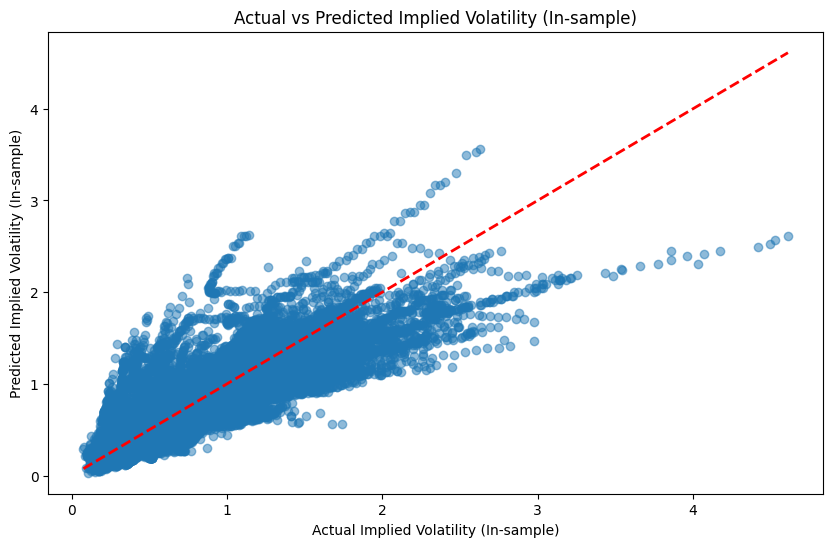

In [375]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def ols(data):
    y = data['impl_volatility']
    X = data.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# Fit the model on the in-sample data
ols_puts = ols(puts_data_all)
print("AHBS Model Summary for Puts (cp_flag = 'P'):")
print(ols_puts.summary())

# Prepare the in-sample data
y_insample = puts_data_all['impl_volatility']
X_insample = puts_data_all.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])
X_insample = sm.add_constant(X_insample)

# Predict on the in-sample data
y_pred_insample = ols_puts.predict(X_insample)

# Calculate RMSE for in-sample data
rmse_insample = np.sqrt(mean_squared_error(y_insample, y_pred_insample))
print(f'In-sample RMSE: {rmse_insample}')

# Calculate R² for in-sample data
r2_insample = r2_score(y_insample, y_pred_insample)
print(f'In-sample R²: {r2_insample}')

# Plot y_insample against y_pred_insample
plt.figure(figsize=(10, 6))
plt.scatter(y_insample, y_pred_insample, alpha=0.5)
plt.plot([y_insample.min(), y_insample.max()], [y_insample.min(), y_insample.max()], 'r--', lw=2)
plt.xlabel('Actual Implied Volatility (In-sample)')
plt.ylabel('Predicted Implied Volatility (In-sample)')
plt.title('Actual vs Predicted Implied Volatility (In-sample)')
plt.show()

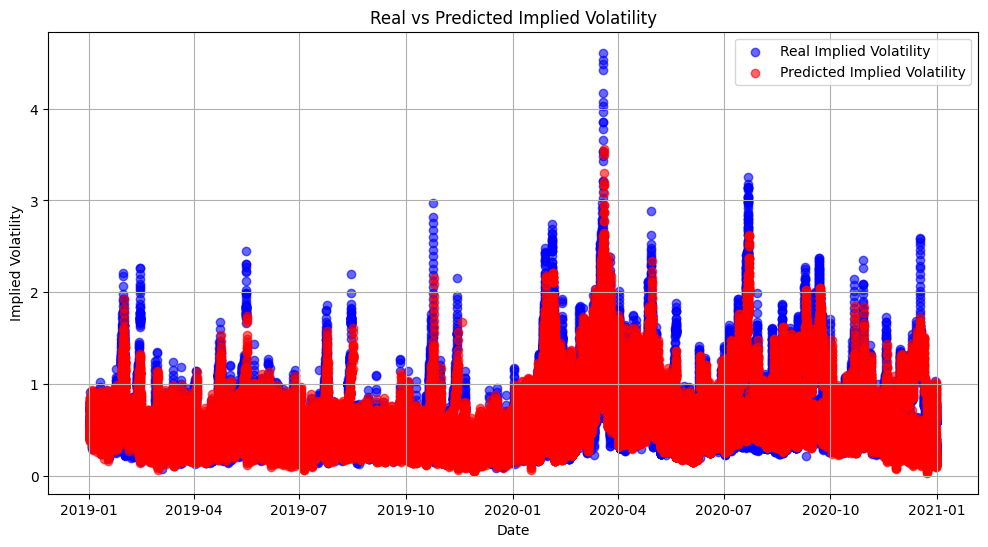

In [376]:
import matplotlib.pyplot as plt

# Step 1: Generate predicted IV using the regression model
# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(puts_data_all['date'], puts_data_all['impl_volatility'], label='Real Implied Volatility', color='blue', alpha=0.6)
plt.scatter(puts_data_all['date'], y_pred_insample, label='Predicted Implied Volatility', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.title('Real vs Predicted Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [377]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# from sklearn.linear_model import Ridge

# def calculate_vif(X):
#     """Calculate the Variance Inflation Factor (VIF) for each feature in the DataFrame."""
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data

# def ols(data):
#     y = data['impl_volatility']
#     X = data.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])
    
#     # Add constant
#     X = sm.add_constant(X)
    
#     # Check VIF
#     vif_data = calculate_vif(X)
#     print("VIF before dropping high multicollinearity variables:")
#     print(vif_data)
    
#     # Remove features with high VIF (e.g., VIF > 10)
#     while vif_data['VIF'].max() > 10:
#         highest_vif_var = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
#         print(f"Dropping '{highest_vif_var}' due to high VIF.")
#         X = X.drop(columns=[highest_vif_var])
#         vif_data = calculate_vif(X)
    
#     # Fit the OLS model
#     model = sm.OLS(y, X).fit()
#     return model

# # Fit the model on the in-sample data
# ols_puts = ols(puts_data_all)
# print("AHBS Model Summary for Puts (cp_flag = 'P'):")
# print(ols_puts.summary())

# # Prepare the in-sample data
# y_insample = puts_data_all['impl_volatility']
# X_insample = puts_data_all.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])

# # Use the same features as the final OLS model after VIF filtering
# X_insample = X_insample[ols_puts.params.index.drop('const')]
# X_insample = sm.add_constant(X_insample)

# # Predict on the in-sample data
# y_pred_insample = ols_puts.predict(X_insample)

# # Calculate RMSE for in-sample data
# rmse_insample = np.sqrt(mean_squared_error(y_insample, y_pred_insample))
# print(f'In-sample RMSE: {rmse_insample}')

# # Calculate R² for in-sample data
# r2_insample = r2_score(y_insample, y_pred_insample)
# print(f'In-sample R²: {r2_insample}')

# # Plot y_insample against y_pred_insample
# plt.figure(figsize=(10, 6))
# plt.scatter(y_insample, y_pred_insample, alpha=0.5)
# plt.plot([y_insample.min(), y_insample.max()], [y_insample.min(), y_insample.max()], 'r--', lw=2)
# plt.xlabel('Actual Implied Volatility (In-sample)')
# plt.ylabel('Predicted Implied Volatility (In-sample)')
# plt.title('Actual vs Predicted Implied Volatility (In-sample)')
# plt.show()

# # # Optionally: Use Ridge Regression as an alternative to OLS
# # ridge_model = Ridge(alpha=1.0)
# # ridge_model.fit(X_insample, y_insample)
# # y_pred_ridge = ridge_model.predict(X_insample)

# # # Calculate RMSE for Ridge Regression
# # rmse_ridge = np.sqrt(mean_squared_error(y_insample, y_pred_ridge))
# # print(f'In-sample RMSE (Ridge): {rmse_ridge}')

# # # Calculate R² for Ridge Regression
# # r2_ridge = r2_score(y_insample, y_pred_ridge)
# # print(f'In-sample R² (Ridge): {r2_ridge}')

# We check now how this holds for the test set

In [378]:
puts_data_test

cp_flag Ticker       date  trading_days_till_exp  moneyness  \
63567        P   AAPL 2021-01-04                      4     -2.411   
63568        P   AAPL 2021-01-04                      4     -2.265   
63569        P   AAPL 2021-01-04                      4     -2.120   
63570        P   AAPL 2021-01-04                      4     -1.977   
63571        P   AAPL 2021-01-04                      4     -1.835   
...        ...    ...        ...                    ...        ...   
123307       P   TSLA 2021-12-30                      1      2.062   
123308       P   TSLA 2021-12-30                      1      2.161   
123309       P   TSLA 2021-12-30                      1      2.261   
123310       P   TSLA 2021-12-30                      1      2.360   
123311       P   TSLA 2021-12-30                      1      2.458   

        impl_volatility  prev_day_iv  prev2_day_iv       BIDLO       ASKHI  \
63567          0.709010     0.404451      0.452074   133.39999   135.99001   
63568          0.680200     0.404451      0.452074   133.39999   135.99001   
63569          0.649632     0.404451      0.452074   133.39999   135.99001   
63570          0.622737     0.404451      0.452074   133.39999   135.99001   
63571          0.598160     0.383928      0.418943   133.39999   135.99001   
...                 ...          ...           ...         ...         ...   
123307         1.012930     0.753005      0.932566  1078.42004  1118.99988   
123308         1.047433     0.753005      0.932566  1078.42004  1118.99988   
123309         1.088575     0.753005      0.932566  1078.42004  1118.99988   
123310         1.129544     0.753005      0.932566  1078.42004  1118.99988   
123311         1.133852     0.753005      0.932566  1078.42004  1118.99988   

        ...  gold_price  reces_indi  10Y_RIR  1Y_bond  2Y_bond  OPEN_vix  \
63567   ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
63568   ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
63569   ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
63570   ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
63571   ...  672.012903    3.036452     0.93   0.1074   0.1400     21.29   
...     ...         ...         ...      ...      ...      ...       ...   
123307  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123308  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123309  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123310  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   
123311  ...  632.874194   -0.206774     1.55   0.4878   0.8182     14.36   

        HIGH_vix  LOW_vix  CLOSE_vix  spread_vix  
63567      22.49    20.57      21.20        1.92  
63568      22.49    20.57      21.20        1.92  
63569      22.49    20.57      21.20        1.92  
63570      22.49    20.57      21.20        1.92  
63571      22.49    20.57      21.20        1.92  
...          ...      ...        ...         ...  
123307     14.60    12.56      12.85        2.04  
123308     14.60    12.56      12.85        2.04  
123309     14.60    12.56      12.85        2.04  
123310     14.60    12.56      12.85        2.04  
123311     14.60    12.56      12.85        2.04  

[59745 rows x 128 columns]

y_test: 63567     0.709010
63568     0.680200
63569     0.649632
63570     0.622737
63571     0.598160
            ...   
123307    1.012930
123308    1.047433
123309    1.088575
123310    1.129544
123311    1.133852
Name: impl_volatility, Length: 59745, dtype: float64
y_pred: 63567     0.399440
63568     0.396004
63569     0.392592
63570     0.389227
63571     0.370045
            ...   
123307    5.103038
123308    5.100708
123309    5.098355
123310    5.096026
123311    5.093719
Length: 59745, dtype: float64
RMSE: 2.679688124739059
R²: -99.52151310473144


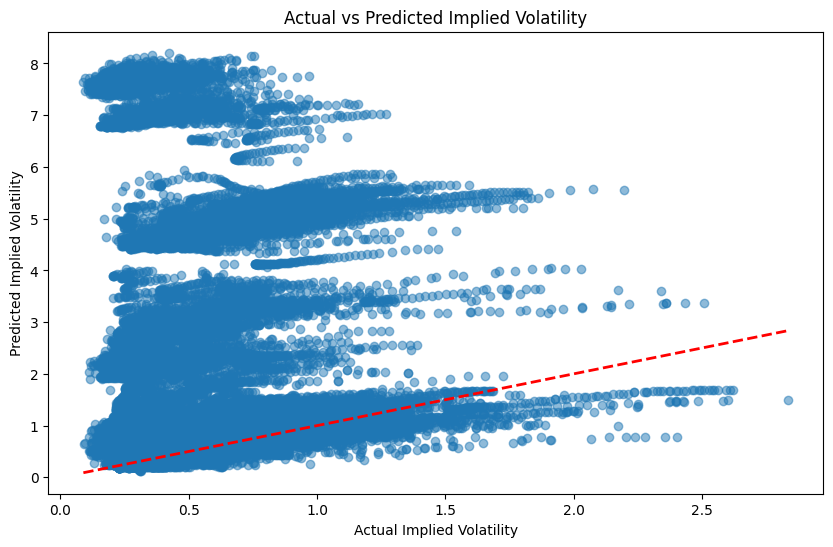

In [379]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the test data using only the features from the in-sample model
selected_features = ols_puts.params.index.drop('const')  # Use the same features selected in the training model
X_test = puts_data_test[selected_features]
X_test = sm.add_constant(X_test)

# Predict on the test set
y_test = puts_data_test['impl_volatility']
y_pred = ols_puts.predict(X_test)

# Debug prints
print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')

# Calculate RMSE
if len(y_test) > 0 and len(y_pred) > 0:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE: {rmse}')
else:
    print("Error: y_test or y_pred is empty")

# Calculate R²
if len(y_test) > 0 and len(y_pred) > 0:
    r2 = r2_score(y_test, y_pred)
    print(f'R²: {r2}')
else:
    print("Error: y_test or y_pred is empty")

# Plot y_test against y_pred
if len(y_test) > 0 and len(y_pred) > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Implied Volatility')
    plt.ylabel('Predicted Implied Volatility')
    plt.title('Actual vs Predicted Implied Volatility')
    plt.show()
else:
    print("Error: y_test or y_pred is empty")


y_test: 63567     0.709010
63568     0.680200
63569     0.649632
63570     0.622737
63571     0.598160
            ...   
123307    1.012930
123308    1.047433
123309    1.088575
123310    1.129544
123311    1.133852
Name: impl_volatility, Length: 59745, dtype: float64
y_pred: 63567     0.399440
63568     0.396004
63569     0.392592
63570     0.389227
63571     0.370045
            ...   
123307    5.103038
123308    5.100708
123309    5.098355
123310    5.096026
123311    5.093719
Length: 59745, dtype: float64
RMSE: 2.679688124739059
R²: -99.52151310473144


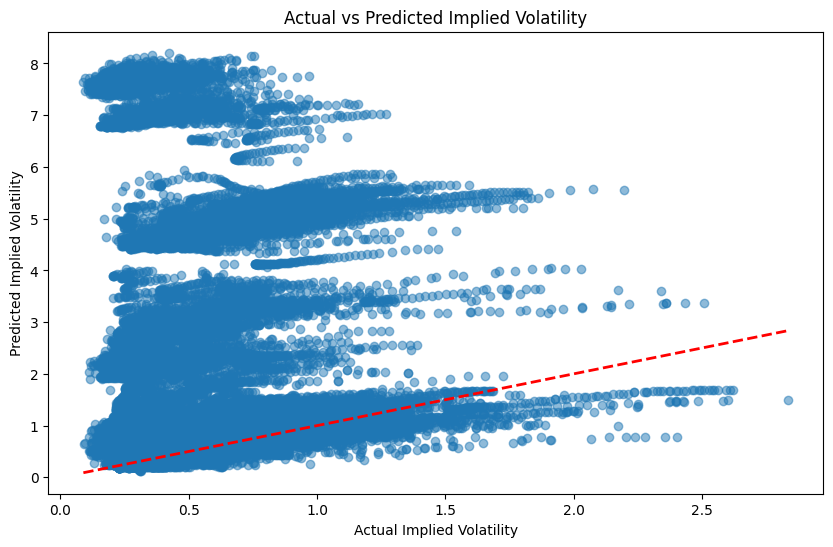

In [380]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the test data
y_test = puts_data_test['impl_volatility']
X_test = puts_data_test.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])
X_test = sm.add_constant(X_test)

# Predict on the test set
y_pred = ols_puts.predict(X_test)

# Debug prints
print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')

# Calculate RMSE
if len(y_test) > 0 and len(y_pred) > 0:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE: {rmse}')
else:
    print("Error: y_test or y_pred is empty")

# Calculate R²
if len(y_test) > 0 and len(y_pred) > 0:
    r2 = r2_score(y_test, y_pred)
    print(f'R²: {r2}')
else:
    print("Error: y_test or y_pred is empty")

# Plot y_test against y_pred
if len(y_test) > 0 and len(y_pred) > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Implied Volatility')
    plt.ylabel('Predicted Implied Volatility')
    plt.title('Actual vs Predicted Implied Volatility')
    plt.show()
else:
    print("Error: y_test or y_pred is empty")

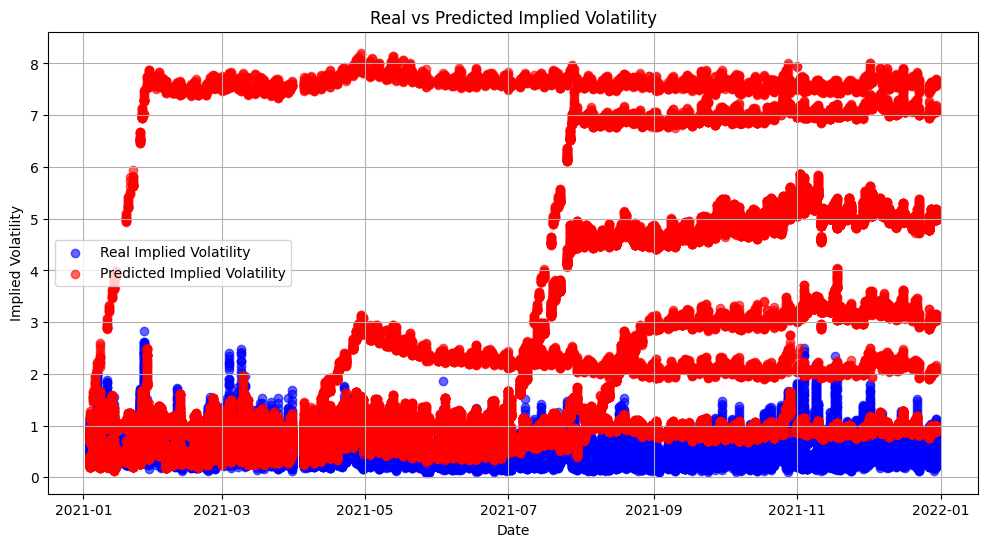

In [381]:
import matplotlib.pyplot as plt

# Step 1: Generate predicted IV using the regression model
# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(puts_data_test['date'], puts_data_test['impl_volatility'], label='Real Implied Volatility', color='blue', alpha=0.6)
plt.scatter(puts_data_test['date'], y_pred, label='Predicted Implied Volatility', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.title('Real vs Predicted Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [382]:
# print(ols_puts.predict(sm.add_constant(puts_data_test.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility']))))

RMSE: 2.679688124739059
R²: -99.52151310473144


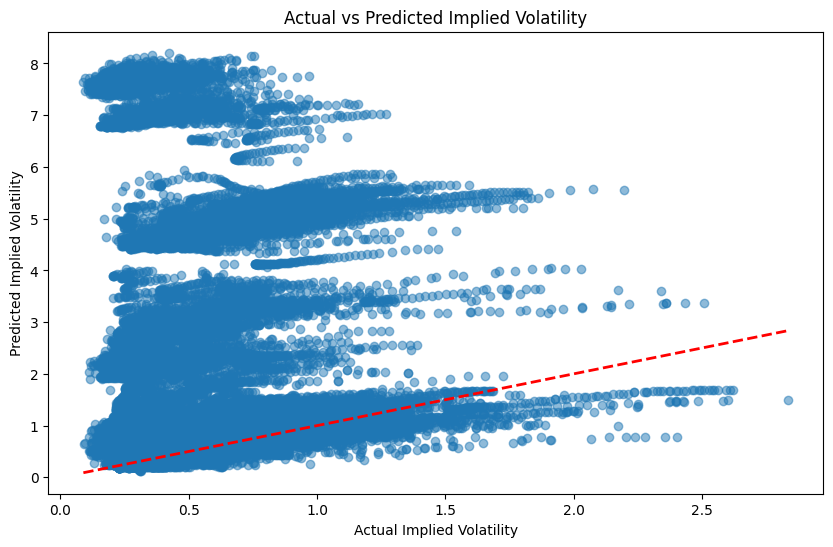

In [383]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the test data
y_test = puts_data_test['impl_volatility']
X_test = puts_data_test.drop(columns=['date', 'Ticker', 'cp_flag', 'impl_volatility'])
X_test = sm.add_constant(X_test)

# Predict on the test set
y_pred = ols_puts.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Plot y_test against y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('Actual vs Predicted Implied Volatility')
plt.show()

In [384]:
# Select the relevant columns for ADHBS model
selected_columns = ['Ticker', 'date', 'cp_flag', 'impl_volatility', 'moneyness', 'T', 'prev_day_iv']
total_train_new = total_train[selected_columns]

total_train_new['moneyness_squared'] = total_train_new['moneyness'] ** 2
total_train_new['tau_squared'] = total_train_new['T'] ** 2
total_train_new['moneyness_tau'] = total_train_new['moneyness'] * total_train_new['T']

calls_data = total_train_new[total_train_new['cp_flag'] == 'C']
puts_data = total_train_new[total_train_new['cp_flag'] == 'P']

KeyError: "['T'] not in index"

In [ ]:
puts_data

Ticker       date cp_flag  impl_volatility  moneyness         T  \
0       AAPL 2019-01-02       P        -0.118447  -1.599060 -0.862489   
1       AAPL 2019-01-02       P        -0.161328  -1.348787 -0.862489   
2       AAPL 2019-01-02       P        -0.202412  -1.099920 -0.862489   
3       AAPL 2019-01-02       P        -0.246881  -0.853865 -0.862489   
4       AAPL 2019-01-02       P        -0.345423  -0.242243 -0.862489   
...      ...        ...     ...              ...        ...       ...   
72959   TSLA 2020-12-31       P        -0.078858   1.347974  1.327470   
72960   TSLA 2020-12-31       P        -0.079386   1.401403  1.327470   
72961   TSLA 2020-12-31       P        -0.080922   1.454832  1.327470   
72962   TSLA 2020-12-31       P        -0.080638   1.561690  1.327470   
72963   TSLA 2020-12-31       P        -0.080777   1.667142  1.327470   

       prev_day_iv  moneyness_squared  tau_squared  moneyness_tau  
0        -0.215265           2.556992     0.743887       1.379172  
1        -0.243882           1.819226     0.743887       1.163314  
2        -0.272954           1.209824     0.743887       0.948669  
3        -0.301999           0.729086     0.743887       0.736449  
4        -0.349271           0.058682     0.743887       0.208932  
...            ...                ...          ...            ...  
72959    -0.077136           1.817034     1.762176       1.789395  
72960    -0.113290           1.963931     1.762176       1.860320  
72961    -0.113290           2.116537     1.762176       1.931246  
72962    -0.145900           2.438877     1.762176       2.073097  
72963    -0.172967           2.779364     1.762176       2.213081  

[72964 rows x 10 columns]

# Linear ADHOC-BS Model

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Function to fit AHBS model
def adhbs_model(data):
    X = data[['moneyness', 'moneyness_squared', 'T', 'tau_squared', 'moneyness_tau']]
    X = sm.add_constant(X)
    y = data['impl_volatility']
    model = sm.OLS(y, X).fit()
    return model

# Fit the AHBS model for calls
# adhbs_model_calls = adhbs_model(calls_data)
# print("AHBS Model Summary for Calls (cp_flag = 'C'):")
# print(adhbs_model_calls.summary())

# Fit the AHBS model for puts
adhbs_model_puts = adhbs_model(puts_data)
print("AHBS Model Summary for Puts (cp_flag = 'P'):")
print(adhbs_model_puts.summary())


AHBS Model Summary for Puts (cp_flag = 'P'):
                            OLS Regression Results                            
Dep. Variable:        impl_volatility   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     689.5
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:36:23   Log-Likelihood:            -1.0185e+05
No. Observations:               72964   AIC:                         2.037e+05
Df Residuals:                   72958   BIC:                         2.038e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to prepare data
def prepare_data(data):
    data = data.copy()  # Ensure we are working with a copy
    data['moneyness_squared'] = data['moneyness'] ** 2
    data['tau_squared'] = data['tau'] ** 2
    data['moneyness_tau'] = data['moneyness'] * data['tau']
    return data

# Function to fit AHBS model
def adhbs_model(data):
    X = data[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']]
    X = sm.add_constant(X)
    y = data['impl_volatility']
    model = sm.OLS(y, X).fit()
    return model

# Split data into training and testing sets
train_data, test_data = train_test_split(total_train, test_size=0.2, random_state=42)

# Filter data for calls (cp_flag = 'C') and puts (cp_flag = 'P')
calls_train_data = train_data[train_data['cp_flag'] == 'C']
puts_train_data = train_data[train_data['cp_flag'] == 'P']
calls_test_data = test_data[test_data['cp_flag'] == 'C']
puts_test_data = test_data[test_data['cp_flag'] == 'P']

# Prepare data for calls and puts
calls_train_data_prepared = prepare_data(calls_train_data)
puts_train_data_prepared = prepare_data(puts_train_data)
calls_test_data_prepared = prepare_data(calls_test_data)
puts_test_data_prepared = prepare_data(puts_test_data)

# Fit the AHBS model for calls
adhbs_model_calls = adhbs_model(calls_train_data_prepared)
print("AHBS Model Summary for Calls (cp_flag = 'C'):")
print(adhbs_model_calls.summary())

# Fit the AHBS model for puts
adhbs_model_puts = adhbs_model(puts_train_data_prepared)
print("AHBS Model Summary for Puts (cp_flag = 'P'):")
print(adhbs_model_puts.summary())

# Make predictions on the training set (in-sample)
calls_train_X = sm.add_constant(calls_train_data_prepared[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']])
calls_train_y = calls_train_data_prepared['impl_volatility']
calls_train_predictions = adhbs_model_calls.predict(calls_train_X)

puts_train_X = sm.add_constant(puts_train_data_prepared[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']])
puts_train_y = puts_train_data_prepared['impl_volatility']
puts_train_predictions = adhbs_model_puts.predict(puts_train_X)

# Make predictions on the test set (out-of-sample)
calls_test_X = sm.add_constant(calls_test_data_prepared[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']])
calls_test_y = calls_test_data_prepared['impl_volatility']
calls_test_predictions = adhbs_model_calls.predict(calls_test_X)

puts_test_X = sm.add_constant(puts_test_data_prepared[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']])
puts_test_y = puts_test_data_prepared['impl_volatility']
puts_test_predictions = adhbs_model_puts.predict(puts_test_X)

# Calculate performance metrics
calls_mse = mean_squared_error(calls_test_y, calls_test_predictions)
puts_mse = mean_squared_error(puts_test_y, puts_test_predictions)

print(f"Out-of-Sample Mean Squared Error for Calls: {calls_mse}")
print(f"Out-of-Sample Mean Squared Error for Puts: {puts_mse}")

# Plotting in-sample and out-of-sample predictions
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Implied Volatility')
    plt.ylabel('Predicted Implied Volatility')
    plt.title(title)
    plt.show()

# In-sample plots
plot_predictions(calls_train_y, calls_train_predictions, 'In-Sample Actual vs Predicted Implied Volatility (Calls)')
plot_predictions(puts_train_y, puts_train_predictions, 'In-Sample Actual vs Predicted Implied Volatility (Puts)')

# Out-of-sample plots
plot_predictions(calls_test_y, calls_test_predictions, 'Out-of-Sample Actual vs Predicted Implied Volatility (Calls)')
plot_predictions(puts_test_y, puts_test_predictions, 'Out-of-Sample Actual vs Predicted Implied Volatility (Puts)')

KeyError: 'tau'

In [ ]:
# import matplotlib.pyplot as plt

# # Function to plot data
# def plot_data(data, x_columns, y_column):
#     for x_column in x_columns:
#         plt.figure(figsize=(10, 6))
#         plt.scatter(data[x_column], data[y_column])
#         plt.xlabel(x_column)
#         plt.ylabel(y_column)
#         plt.title(f'{y_column} vs {x_column}')
#         plt.show()

# # Plot data for calls
# plot_data(calls_data, ['moneyness', 'moneyness_squared', 'tau', 'moneyness_tau'], 'impl_volatility')

# # Plot data for puts
# plot_data(puts_data, ['moneyness', 'moneyness_squared', 'tau', 'moneyness_tau'], 'impl_volatility')

In [ ]:
coefficients = adhbs_model_puts.params
coefficients

for coef in coefficients:
    print(coef)

-0.05224166589775254
-0.20201378102851394
0.03323910826205684
-0.23282530894192022
0.01763407778673835
0.054885231461379455


In [ ]:
puts_data_adhoc = puts_data[['date', 'cp_flag', 'Ticker','moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau', 'impl_volatility']]
puts_data_test_adhoc = puts_data_test[['date','cp_flag', 'Ticker','moneyness', 'tau', 'impl_volatility']]
puts_data_test_adhoc

date cp_flag Ticker  moneyness       tau  impl_volatility
229903 2021-01-04       P   AAPL     -2.411  0.019841         0.709010
229904 2021-01-04       P   AAPL     -2.265  0.019841         0.680200
229905 2021-01-04       P   AAPL     -2.120  0.019841         0.649632
229906 2021-01-04       P   AAPL     -1.977  0.019841         0.622737
229907 2021-01-04       P   AAPL     -1.835  0.019841         0.598160
...           ...     ...    ...        ...       ...              ...
374094 2021-12-30       P   NVDA      0.209  0.007937         0.482365
374095 2021-12-30       P   NVDA      0.418  0.007937         0.511517
374096 2021-12-30       P   NVDA      0.625  0.007937         0.540416
374097 2021-12-30       P   NVDA      0.831  0.007937         0.612148
374098 2021-12-30       P   NVDA      1.638  0.007937         0.786674

[44581 rows x 6 columns]

In [ ]:
puts_data_test_adhoc.sort_values(by=['impl_volatility'], inplace=True)
puts_data_test_adhoc

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_97912/1334024957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puts_data_test_adhoc.sort_values(by=['impl_volatility'], inplace=True)


date cp_flag Ticker  moneyness       tau  impl_volatility
348366 2021-05-28       P   MSFT      1.098  0.019841         0.089478
292476 2021-05-27       P   AMZN     -0.231  0.007937         0.093313
349687 2021-10-28       P   MSFT      1.282  0.007937         0.095991
349324 2021-09-24       P   MSFT      1.717  0.023810         0.097139
293521 2021-06-17       P   AMZN      0.947  0.007937         0.097350
...           ...     ...    ...        ...       ...              ...
372682 2021-11-04       P   NVDA     -2.382  0.007937         2.361083
372685 2021-11-04       P   NVDA     -2.074  0.007937         2.361511
366502 2021-03-04       P   NVDA      2.369  0.007937         2.402478
372684 2021-11-04       P   NVDA     -2.176  0.007937         2.434766
372683 2021-11-04       P   NVDA     -2.278  0.007937         2.508810

[44581 rows x 6 columns]

## Non linear ADHOC-BS model

In [ ]:
#Add a few filters for the puts that moenyness <+ -0.5
# puts_data_adhoc_f = puts_data_adhoc[(puts_data_adhoc['moneyness'] < -0.5) & (puts_data_adhoc['Ticker'] == "AAPL") & (puts_data_adhoc['date'] <= "2022-02-02")]
# puts_data_test_adhoc_f = puts_data_test_adhoc[(puts_data_test_adhoc['moneyness'] < -0.5) & (puts_data_test_adhoc['Ticker'] == "AAPL") & (puts_data_test_adhoc['date'] <= "2021-02-02") & puts_data_test_adhoc['impl_volatility'] <= 0.7]


In [ ]:
puts_data_adhoc

date cp_flag Ticker  moneyness  moneyness_squared       tau  \
65527  2019-01-02       P   AAPL   1.057357           1.118004 -0.852804   
65526  2019-01-02       P   AAPL   1.544863           2.386602 -0.852804   
65525  2019-01-02       P   AAPL   0.562786           0.316728 -0.852804   
65524  2019-01-02       P   AAPL   0.059972           0.003597 -0.852804   
65523  2019-01-02       P   AAPL  -0.452262           0.204541 -0.852804   
...           ...     ...    ...        ...                ...       ...   
130998 2020-12-31       P   NVDA   1.670861           2.791776  1.331625   
130997 2020-12-31       P   NVDA  -0.939768           0.883164  1.331625   
130996 2020-12-31       P   NVDA  -1.203539           1.448507  1.331625   
130995 2020-12-31       P   NVDA  -1.469666           2.159918  1.331625   
130994 2020-12-31       P   NVDA  -1.738147           3.021156  1.331625   

        tau_squared  moneyness_tau  impl_volatility  
65527      0.727274      -0.901718        -0.273642  
65526      0.727274      -1.317465        -0.252978  
65525      0.727274      -0.479946        -0.228295  
65524      0.727274      -0.051144        -0.124265  
65523      0.727274       0.385691         0.013393  
...             ...            ...              ...  
130998     1.773226       2.224961        -0.563720  
130997     1.773226      -1.251419        -0.553008  
130996     1.773226      -1.602664        -0.511052  
130995     1.773226      -1.957044        -0.462453  
130994     1.773226      -2.314561        -0.420912  

[65501 rows x 9 columns]

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Function to estimate the AR coefficients for alpha variables (without using additional lags)
def estimate_ar_coefficients(data):
    a_coefficients = []
    for l in range(6):
        # Here we generate random normal values for each alpha series
        # Since there's no lagged version needed, we estimate a single coefficient
        a_coefficients.append(np.random.normal())
    return a_coefficients

# Function to simulate the alpha coefficients using a simplified model
def simulate_alpha_linear(data, a_coefficients):
    alpha_columns = [f'alpha_{l}' for l in range(6)]
    
    for col in alpha_columns:
        data[col] = np.nan  # Initialize alpha columns with NaN
    
    # Generate the alpha values without additional lags
    for l in range(6):
        data[f'alpha_{l}'] = (
            a_coefficients[l] * np.ones(len(data)) +  # Multiply by 1 since no lag is needed
            np.random.normal(size=len(data))  # e_ℓ,i is modeled as a normal noise
        )
    
    return data

# Function to fit the regression model
def fit_regression_model(data):
    # Select the independent variables including simulated alpha coefficients
    X = data[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau',
              'alpha_0', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5']]
    
    # Add a constant term (intercept)
    X = sm.add_constant(X)
    
    # The dependent variable is the observed impl_volatility
    y = data['impl_volatility']
    
    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    return model

# Assuming `puts_data_adhoc` is your provided dataset
# Estimate the AR coefficients for the alpha variables
a_coefficients = estimate_ar_coefficients(puts_data_adhoc)

# Simulate the alpha coefficients without using additional lags
training_data = simulate_alpha_linear(puts_data_adhoc, a_coefficients)

# Fit the regression model using the observed impl_volatility
regression_model = fit_regression_model(training_data)

# Print the summary of the regression model to see the results
print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:        impl_volatility   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     687.3
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:39:41   Log-Likelihood:                -89363.
No. Observations:               65501   AIC:                         1.788e+05
Df Residuals:                   65489   BIC:                         1.789e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0412      0.01

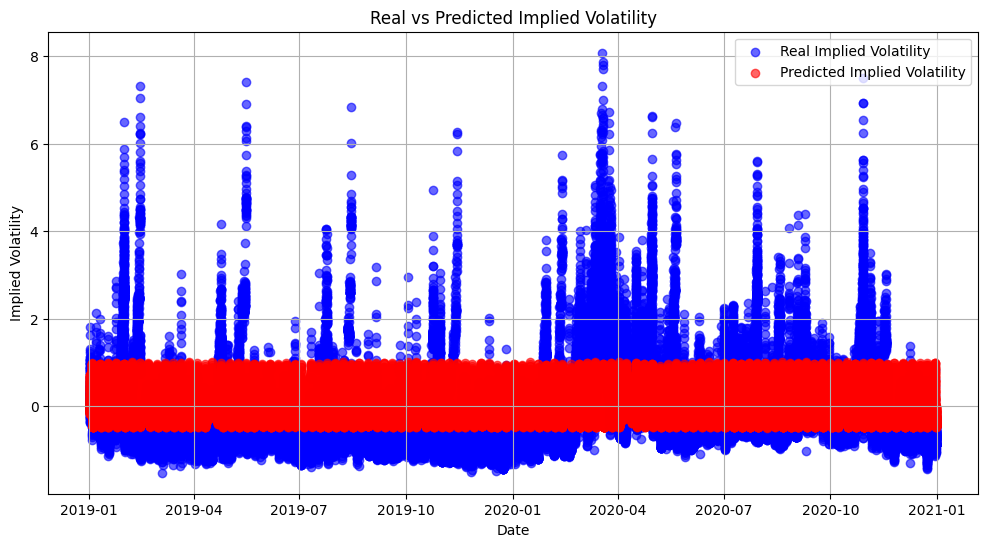

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Generate predicted IV using the regression model
training_data['predicted_impl_volatility'] = regression_model.predict(sm.add_constant(training_data[['moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau',
                                                                                                      'alpha_0', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5']]))

# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(training_data['date'], training_data['impl_volatility'], label='Real Implied Volatility', color='blue', alpha=0.6)
plt.scatter(training_data['date'], training_data['predicted_impl_volatility'], label='Predicted Implied Volatility', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.title('Real vs Predicted Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
coef = regression_model.params[['const','moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']]
print(coef)

const               -0.041152
moneyness           -0.201919
moneyness_squared    0.031647
tau                 -0.234110
tau_squared          0.016368
moneyness_tau        0.054406
dtype: float64


In [ ]:
coef = regression_model.params[['const','moneyness', 'moneyness_squared', 'tau', 'tau_squared', 'moneyness_tau']]
# Define the constants
alpha_0 = coef['const']
alpha_1 = coef['moneyness']
alpha_2 = coef['moneyness_squared']
alpha_3 = coef['tau']
alpha_4 = coef['tau_squared']
alpha_5 = coef['moneyness_tau']

# Calculate the implied volatility (IV) using the given formula
def calculate_iv(row):
    m = row['moneyness']
    tau = row['tau']
    
    IV = (alpha_0 +
          alpha_1 * m +
          alpha_2 * m**2 +
          alpha_3 * tau +
          alpha_4 * tau**2 +
          alpha_5 * m * tau)
    
    return IV

# Apply the function to each row in the dataset
puts_data_test_adhoc['IV'] = puts_data_test_adhoc.apply(calculate_iv, axis=1)

# Display the dataset with the predicted IV
print(puts_data_test_adhoc[['moneyness', 'tau', 'IV', 'impl_volatility']])

        moneyness       tau        IV  impl_volatility
348366      1.098  0.019841 -0.228159         0.089478
292476     -0.231  0.007937  0.005223         0.093313
349687      1.282  0.007937 -0.249303         0.095991
349324      1.717  0.023810 -0.297890         0.097139
293521      0.947  0.007937 -0.205436         0.097350
...           ...       ...       ...              ...
372682     -2.382  0.007937  0.616493         2.361083
372685     -2.074  0.007937  0.511002         2.361511
366502      2.369  0.007937 -0.342726         2.402478
372684     -2.176  0.007937  0.545272         2.434766
372683     -2.278  0.007937  0.580201         2.508810

[44581 rows x 4 columns]


/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_97912/1743519976.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puts_data_test_adhoc['IV'] = puts_data_test_adhoc.apply(calculate_iv, axis=1)


In [ ]:
puts_data_test_adhoc

date cp_flag Ticker  moneyness       tau  impl_volatility  \
348366 2021-05-28       P   MSFT      1.098  0.019841         0.089478   
292476 2021-05-27       P   AMZN     -0.231  0.007937         0.093313   
349687 2021-10-28       P   MSFT      1.282  0.007937         0.095991   
349324 2021-09-24       P   MSFT      1.717  0.023810         0.097139   
293521 2021-06-17       P   AMZN      0.947  0.007937         0.097350   
...           ...     ...    ...        ...       ...              ...   
372682 2021-11-04       P   NVDA     -2.382  0.007937         2.361083   
372685 2021-11-04       P   NVDA     -2.074  0.007937         2.361511   
366502 2021-03-04       P   NVDA      2.369  0.007937         2.402478   
372684 2021-11-04       P   NVDA     -2.176  0.007937         2.434766   
372683 2021-11-04       P   NVDA     -2.278  0.007937         2.508810   

              IV  
348366 -0.228159  
292476  0.005223  
349687 -0.249303  
349324 -0.297890  
293521 -0.205436  
...          ...  
372682  0.616493  
372685  0.511002  
366502 -0.342726  
372684  0.545272  
372683  0.580201  

[44581 rows x 7 columns]

RMSE: 0.4630022794170546
R²: -4.344724493919538


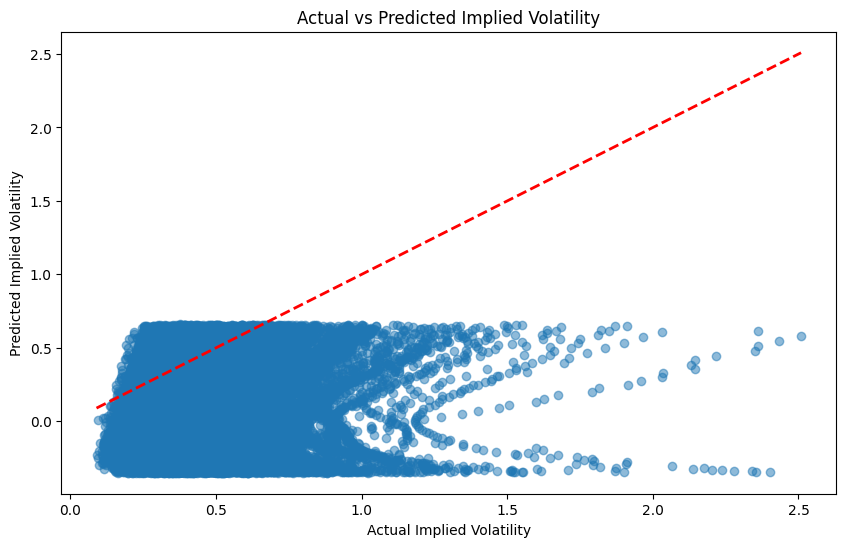

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming that `puts_data_adhoc` is the original dataset with actual `impl_volatility` values
# The simulated `impl_volatility` has already been calculated using your previous code

# Extract the actual observed IV values before simulation
y_true = puts_data_test_adhoc['impl_volatility']

# The simulated IV values are in `training_data['impl_volatility']`
y_pred = puts_data_test_adhoc['IV']

# Drop any NaN values in both series to ensure they align correctly
y_true = y_true.dropna()
y_pred = y_pred.dropna()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate R²
r2 = r2_score(y_true, y_pred)

# Print the results
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot y_true against y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('Actual Implied Volatility')
plt.ylabel('Predicted Implied Volatility')
plt.title('Actual vs Predicted Implied Volatility')
plt.show()

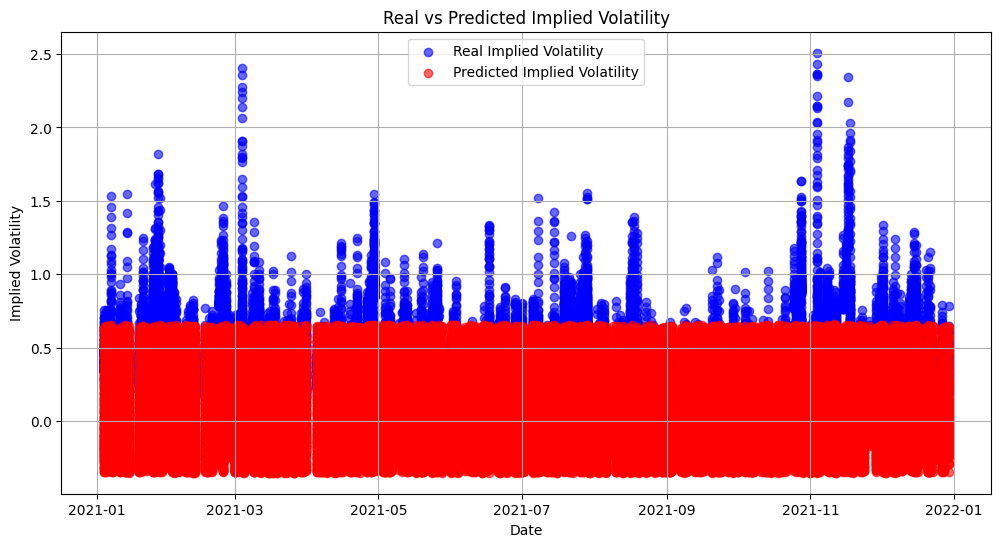

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Generate predicted IV using the regression model
# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(puts_data_test_adhoc['date'], puts_data_test_adhoc['impl_volatility'], label='Real Implied Volatility', color='blue', alpha=0.6)
plt.scatter(puts_data_test_adhoc['date'], puts_data_test_adhoc['IV'], label='Predicted Implied Volatility', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.title('Real vs Predicted Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred

348366   -0.228159
292476    0.005223
349687   -0.249303
349324   -0.297890
293521   -0.205436
            ...   
372682    0.616493
372685    0.511002
366502   -0.342726
372684    0.545272
372683    0.580201
Name: IV, Length: 44581, dtype: float64

In [ ]:
puts_data_adhoc

date cp_flag Ticker  moneyness  moneyness_squared       tau  \
65527  2019-01-02       P   AAPL   1.057357           1.118004 -0.852804   
65526  2019-01-02       P   AAPL   1.544863           2.386602 -0.852804   
65525  2019-01-02       P   AAPL   0.562786           0.316728 -0.852804   
65524  2019-01-02       P   AAPL   0.059972           0.003597 -0.852804   
65523  2019-01-02       P   AAPL  -0.452262           0.204541 -0.852804   
...           ...     ...    ...        ...                ...       ...   
130998 2020-12-31       P   NVDA   1.670861           2.791776  1.331625   
130997 2020-12-31       P   NVDA  -0.939768           0.883164  1.331625   
130996 2020-12-31       P   NVDA  -1.203539           1.448507  1.331625   
130995 2020-12-31       P   NVDA  -1.469666           2.159918  1.331625   
130994 2020-12-31       P   NVDA  -1.738147           3.021156  1.331625   

        tau_squared  moneyness_tau  impl_volatility   alpha_0   alpha_1  \
65527      0.727274      -0.901718        -0.273642  1.692037  2.932360   
65526      0.727274      -1.317465        -0.252978  0.996810  1.982767   
65525      0.727274      -0.479946        -0.228295  0.919274  2.047178   
65524      0.727274      -0.051144        -0.124265  0.114153  2.126460   
65523      0.727274       0.385691         0.013393  2.610304  1.580625   
...             ...            ...              ...       ...       ...   
130998     1.773226       2.224961        -0.563720  0.979039  0.709224   
130997     1.773226      -1.251419        -0.553008  0.472026  1.724273   
130996     1.773226      -1.602664        -0.511052  1.881344  2.026290   
130995     1.773226      -1.957044        -0.462453  0.383384  2.704034   
130994     1.773226      -2.314561        -0.420912 -1.072631  1.766134   

         alpha_2   alpha_3   alpha_4   alpha_5  predicted_impl_volatility  
65527   0.339545  1.328252  1.216487 -0.657104                  -0.073373  
65526  -1.319085  0.390751 -0.368661 -1.055452                  -0.140598  
65525  -0.632439  0.309049 -0.869734  1.187488                   0.032860  
65524  -0.754250  0.720839  0.476913  0.527936                   0.147839  
65523  -1.835666  1.978947  0.737677  0.525188                   0.260472  
...          ...       ...       ...       ...                        ...  
130998  0.625049 -1.176120 -0.744386  0.376281                  -0.453152  
130997  1.057442 -1.465561 -2.338574  0.822490                  -0.164852  
130996 -1.133589 -1.537045  0.150175  0.037478                  -0.134590  
130995  1.034205  0.962788  1.964628  1.189267                  -0.083173  
130994 -2.469224  0.438549 -0.127426  1.136276                  -0.004520  

[65501 rows x 16 columns]

In [ ]:

# # Function to create rolling window data
# def create_rolling_window(df, window_size):
#     X, y = [], []
#     for i in range(len(df) - window_size):
#         X.append(df['impl_volatility'].iloc[i:i+window_size].values)
#         y.append(df['impl_volatility'].iloc[i+window_size])
#     return np.array(X), np.array(y)

# # Create a DataFrame to store the results
# results = pd.DataFrame(columns=['Ticker', 'RMSE LR', 'OoR^2 LR'])

# # Get unique tickers
# tickers = df_standardized['Ticker'].unique()

# # Create a separate model for each ticker
# for ticker in tickers:
#     # Select the rows for the current ticker
#     df_ticker = df_standardized[df_standardized['Ticker'] == ticker]

#     # Split the data into training and testing sets
#     train_data = df_ticker[df_ticker['date'].dt.year < 2021]
#     test_data = df_ticker[df_ticker['date'].dt.year == 2021]

#     # Create rolling window data with a window size of 4
#     window_size = 4
#     X_train, y_train = create_rolling_window(train_data, window_size)
#     X_test, y_test = create_rolling_window(test_data, window_size)
#     # Train a simple model (e.g., Linear Regression) for demonstration
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = model.predict(X_test)

    
    
#     # # Calculate the RMSE
#     # mse = mean_squared_error(y_test, y_pred)
#     # rmse = np.sqrt(mse)
#     # # rmse = calculate_daily_rmse(df)
#     # # Calculate the out-of-sample R^2
#     # ooR2 = calculate_oos_r2(y_test, y_pred)

#     # # Store the results
#     # results = pd.concat([results, pd.DataFrame([{'Ticker': ticker, 'RMSE LR': rmse, 'OoR^2 LR': ooR2}])], ignore_index=True)

# # Print the results
# results

In [ ]:
y_pred

348366   -0.228159
292476    0.005223
349687   -0.249303
349324   -0.297890
293521   -0.205436
            ...   
372682    0.616493
372685    0.511002
366502   -0.342726
372684    0.545272
372683    0.580201
Name: IV, Length: 44581, dtype: float64

## Adhoc-BS model

In [ ]:
# Function to prepare the data for the AHBS model
df = data

def prepare_ahbs_data(df):
    df['moneyness_squared'] = df['moneyness'] ** 2
    df['moneyness_times_ttm'] = df['moneyness'] * df['T']
    X = df[['moneyness', 'moneyness_squared', 'T', 'moneyness_times_ttm']]
    y = df['impl_volatility']
    return X, y

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Ticker', 'RMSE', 'ooR2'])

# Create a separate model for each ticker
for ticker in tickers:
    # Select the rows for the current ticker
    df_ticker = df_standardized[df_standardized['Ticker'] == ticker]

    # Split the data into training and testing sets
    train_data = df_ticker[df_ticker['date'].dt.year < 2021]
    test_data = df_ticker[df_ticker['date'].dt.year == 2021]

    # Prepare the data for the AHBS model
    X_train, y_train = prepare_ahbs_data(train_data)
    X_test, y_test = prepare_ahbs_data(test_data)

    # Train the AHBS model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calculate the out-of-sample R^2
    ooR2 = calculate_oos_r2(y_test, y_pred)

    # Store the results
    results = pd.concat([results, pd.DataFrame([{'Ticker': ticker, 'RMSE': rmse, 'ooR2': ooR2}])], ignore_index=True)

    # # Plot the predictions vs actual values
    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data['date'], y_test, label='Actual Values')
    # plt.plot(test_data['date'], y_pred, label='Predicted Values')
    # plt.xlabel('Date')
    # plt.ylabel('Implied Volatility')
    # plt.title(f'Predicted vs Actual Implied Volatility for {ticker} in 2021')
    # plt.legend()
    # plt.show()



# Print the results
print(results)

# Store the results
results_row = {'Ticker': ticker, 'RMSE': rmse, 'ooR2': ooR2}
if ticker in results['Ticker'].values:
    results.loc[results['Ticker'] == ticker, ['RMSE', 'ooR2']] = [rmse, ooR2]
else:
    results = results.append(results_row, ignore_index=True)

results

NameError: name 'tickers' is not defined

Mean Squared Error for AMZN in 2021: 0.0010128778085938563


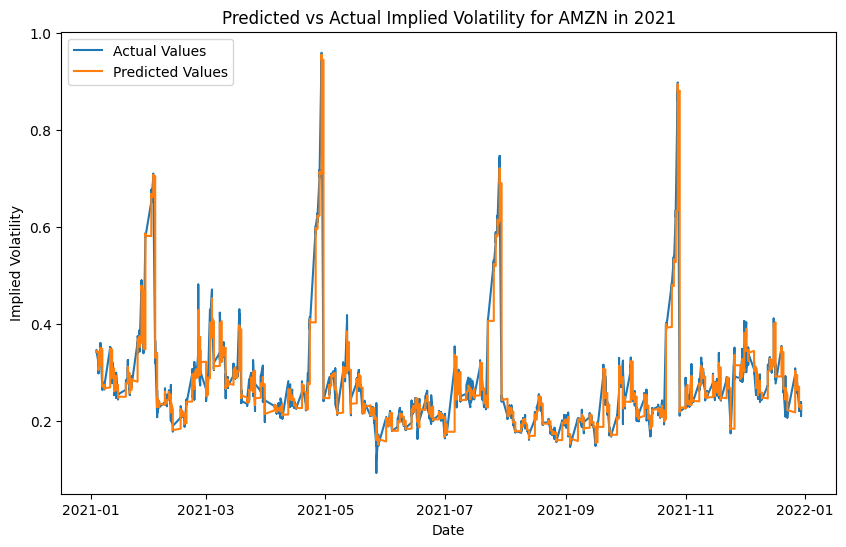

Mean Squared Error for BKNG in 2021: 0.0011607025368343274


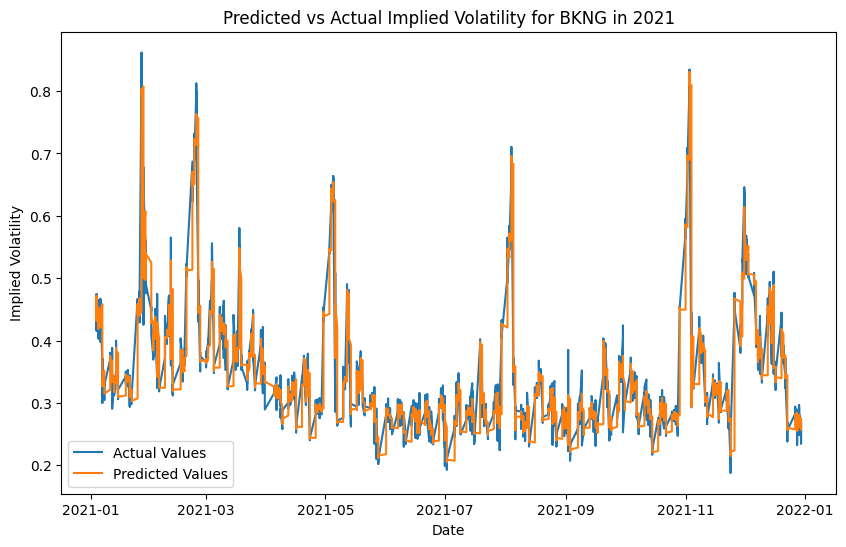

Mean Squared Error for META in 2021: 0.0041654013793880305


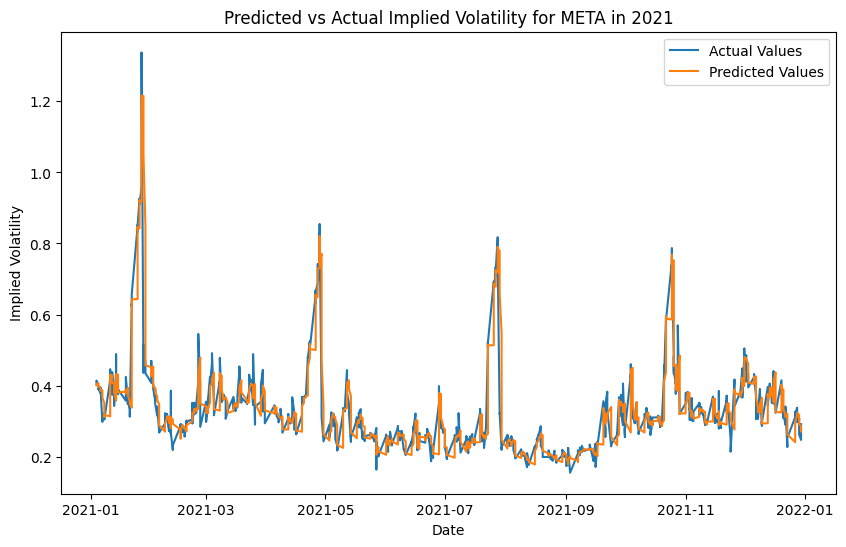

Mean Squared Error for WMT in 2021: 0.0019325550689523524


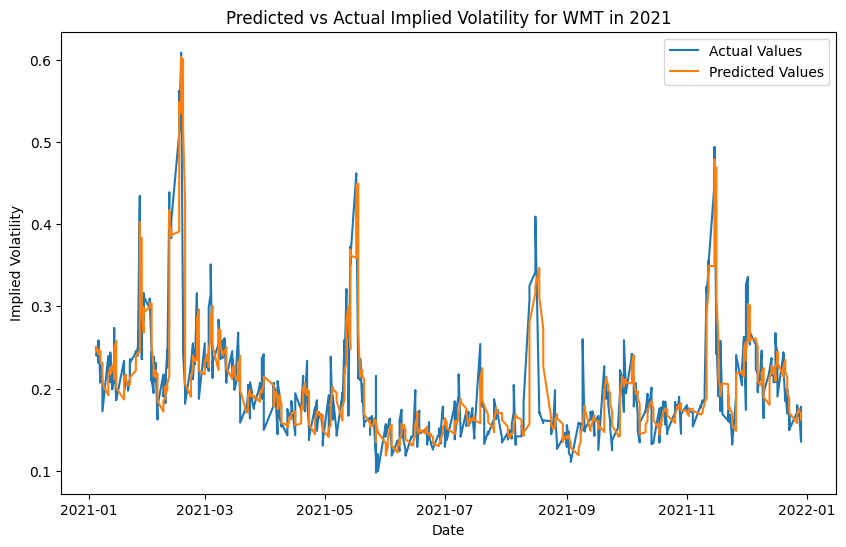

Mean Squared Error for EXPE in 2021: 0.019978609492801273


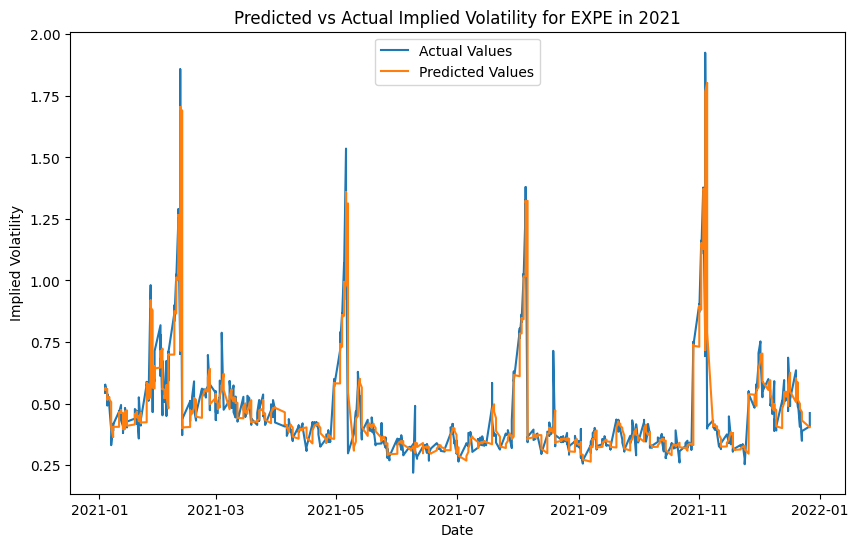

Mean Squared Error for MSFT in 2021: 0.002079382827941805


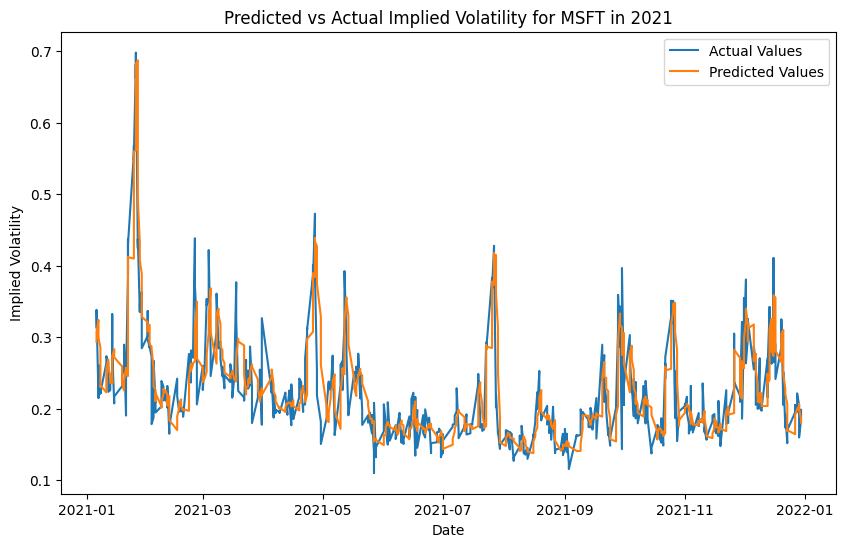

Mean Squared Error for TSLA in 2021: 0.002765704632912524


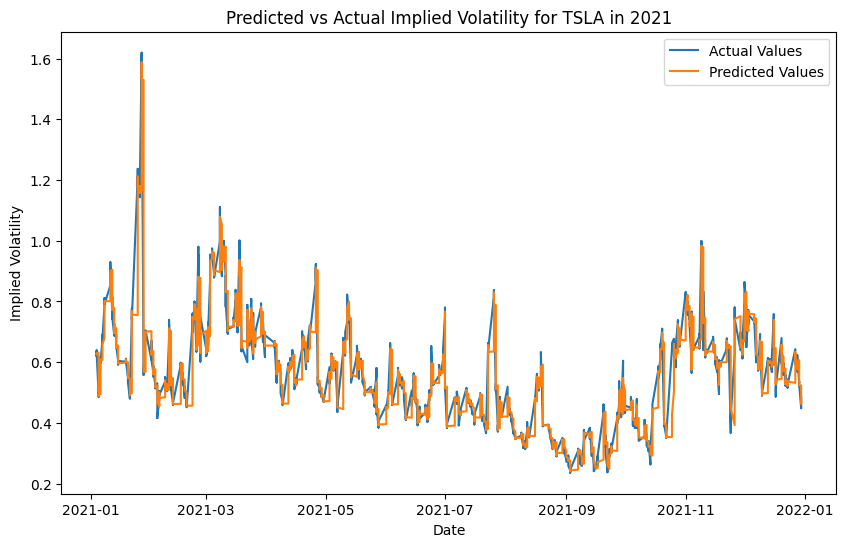

Mean Squared Error for NVDA in 2021: 0.003331479054872507


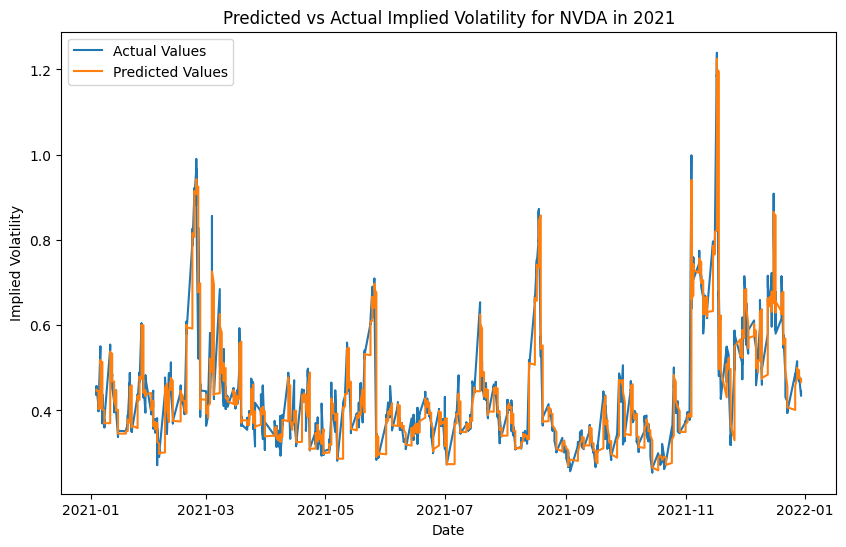

Mean Squared Error for COST in 2021: 0.0028907102072302745


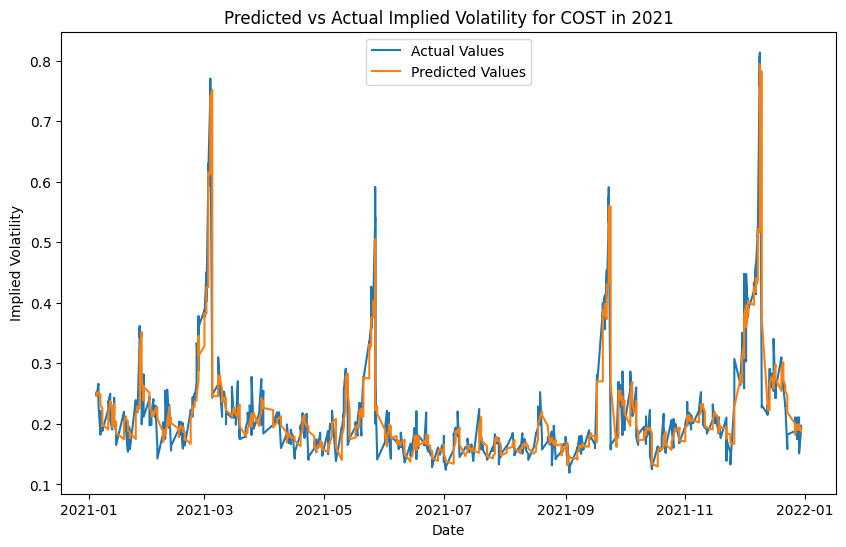

Mean Squared Error for COHR in 2021: 0.05028159832643952


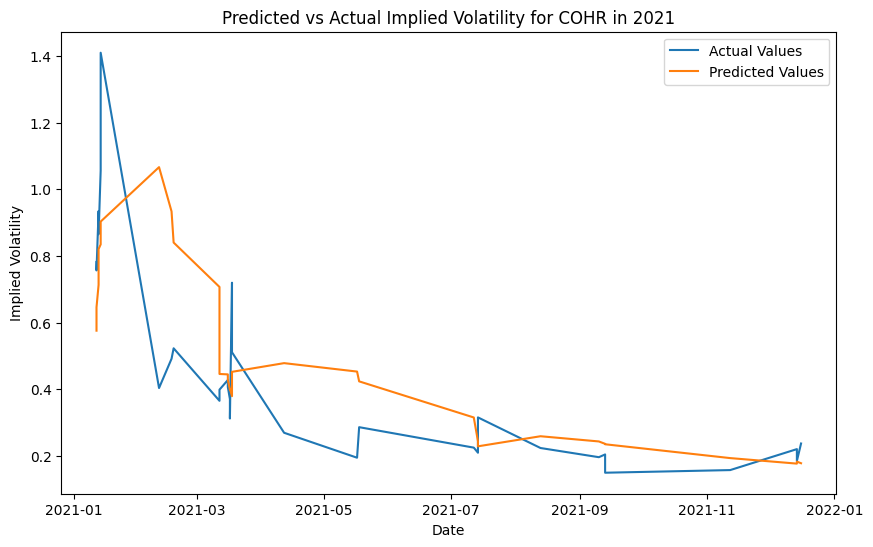

In [ ]:
# Get unique tickers
df = df_standardized 

tickers = df['Ticker'].unique()

# Function to create rolling window data
def create_rolling_window(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df['impl_volatility'].iloc[i:i+window_size].values)
        y.append(df['impl_volatility'].iloc[i+window_size])
    return np.array(X), np.array(y)

for ticker in tickers:
    # Select the rows for the current ticker
    df_ticker = df[df['Ticker'] == ticker]

    # Split the data into training and testing sets
    train_data = df_ticker[df_ticker['date'].dt.year < 2021]
    test_data = df_ticker[df_ticker['date'].dt.year == 2021]

    # Create rolling window data with a window size of 4
    window_size = 4
    X_train, y_train = create_rolling_window(train_data, window_size)
    X_test, y_test = create_rolling_window(test_data, window_size)

    # Implementing a simple ad-hoc BS model for demonstration
    def ad_hoc_bs_model(X):
        # For simplicity, we take the mean of implied volatilities as our prediction
        # This is a placeholder for a more sophisticated model
        return X.mean(axis=1)

    # Predict on the test set using ad-hoc BS model
    y_pred = ad_hoc_bs_model(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {ticker} in 2021: {mse}")

    # Plot the predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['date'][window_size:], y_test, label='Actual Values')
    plt.plot(test_data['date'][window_size:], y_pred, label='Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Implied Volatility')
    plt.title(f'Predicted vs Actual Implied Volatility for {ticker} in 2021')
    plt.legend()
    plt.show()

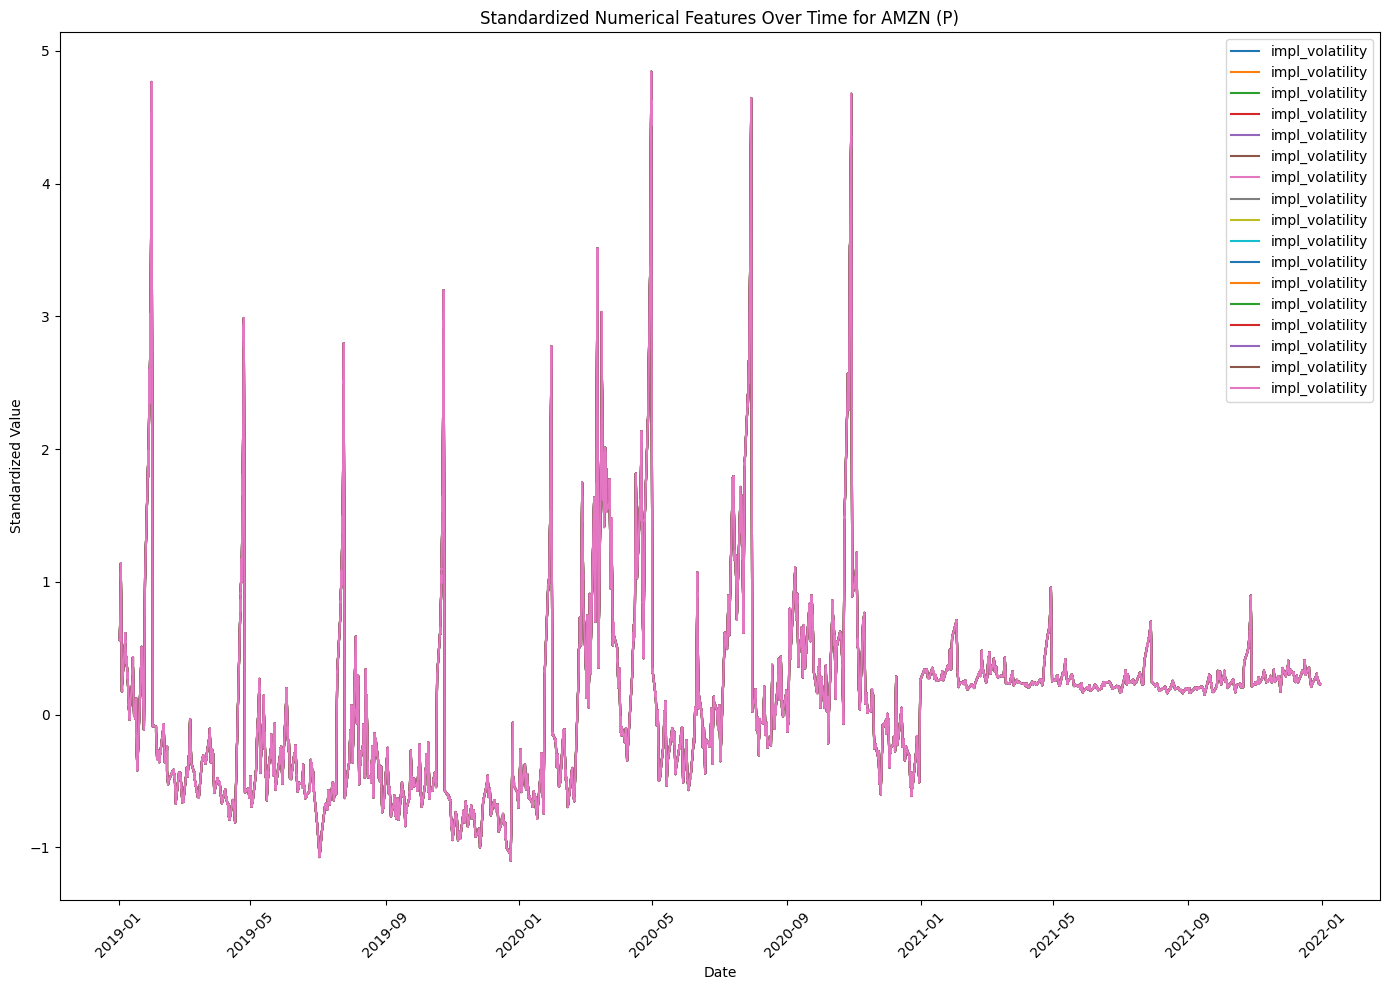

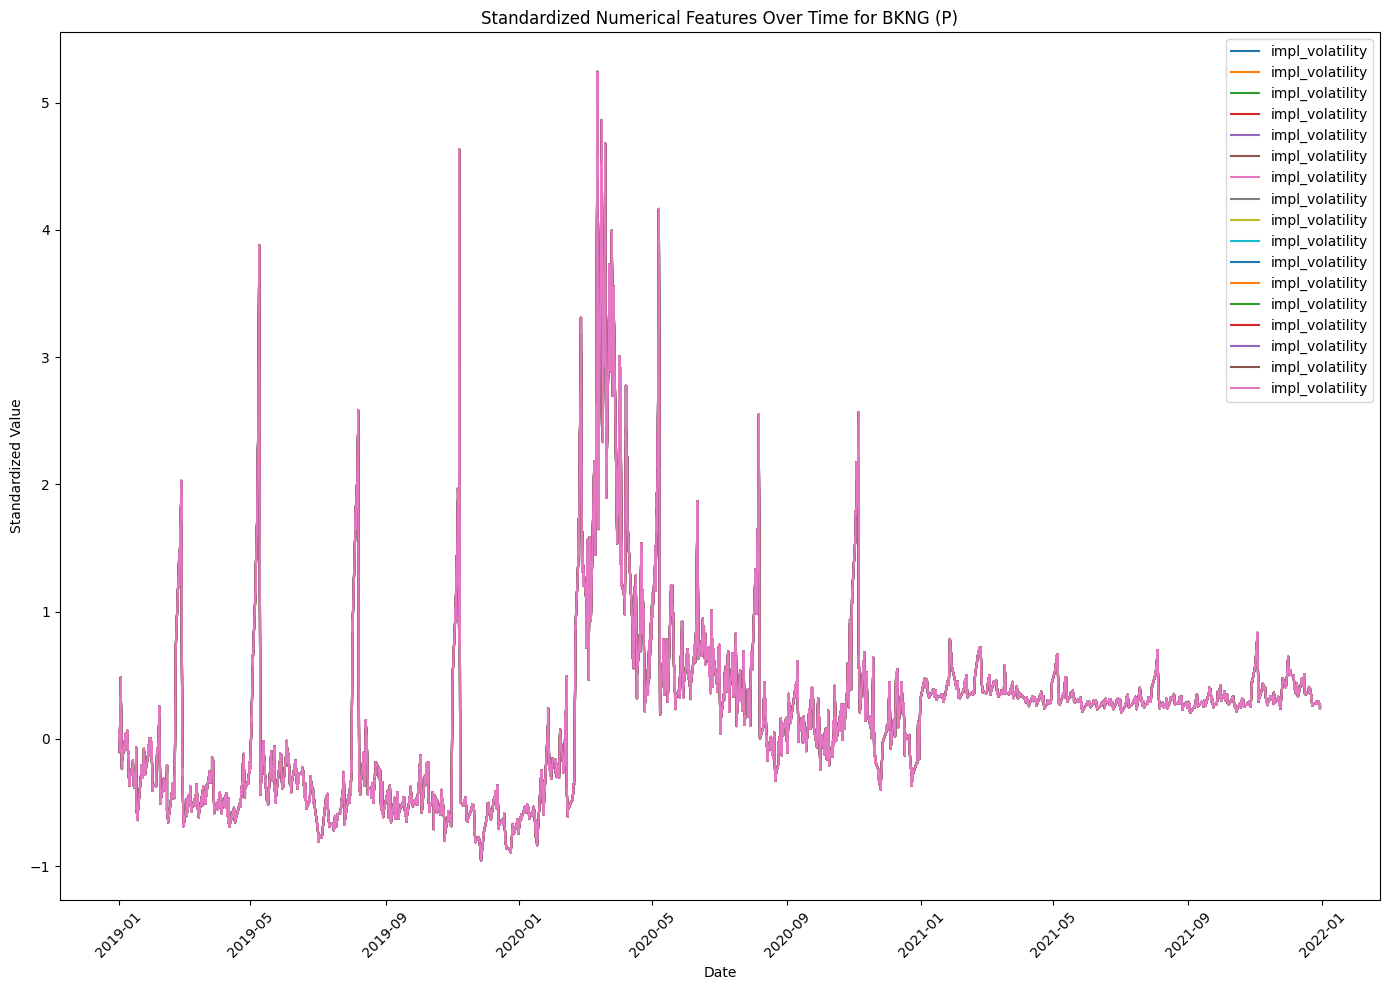

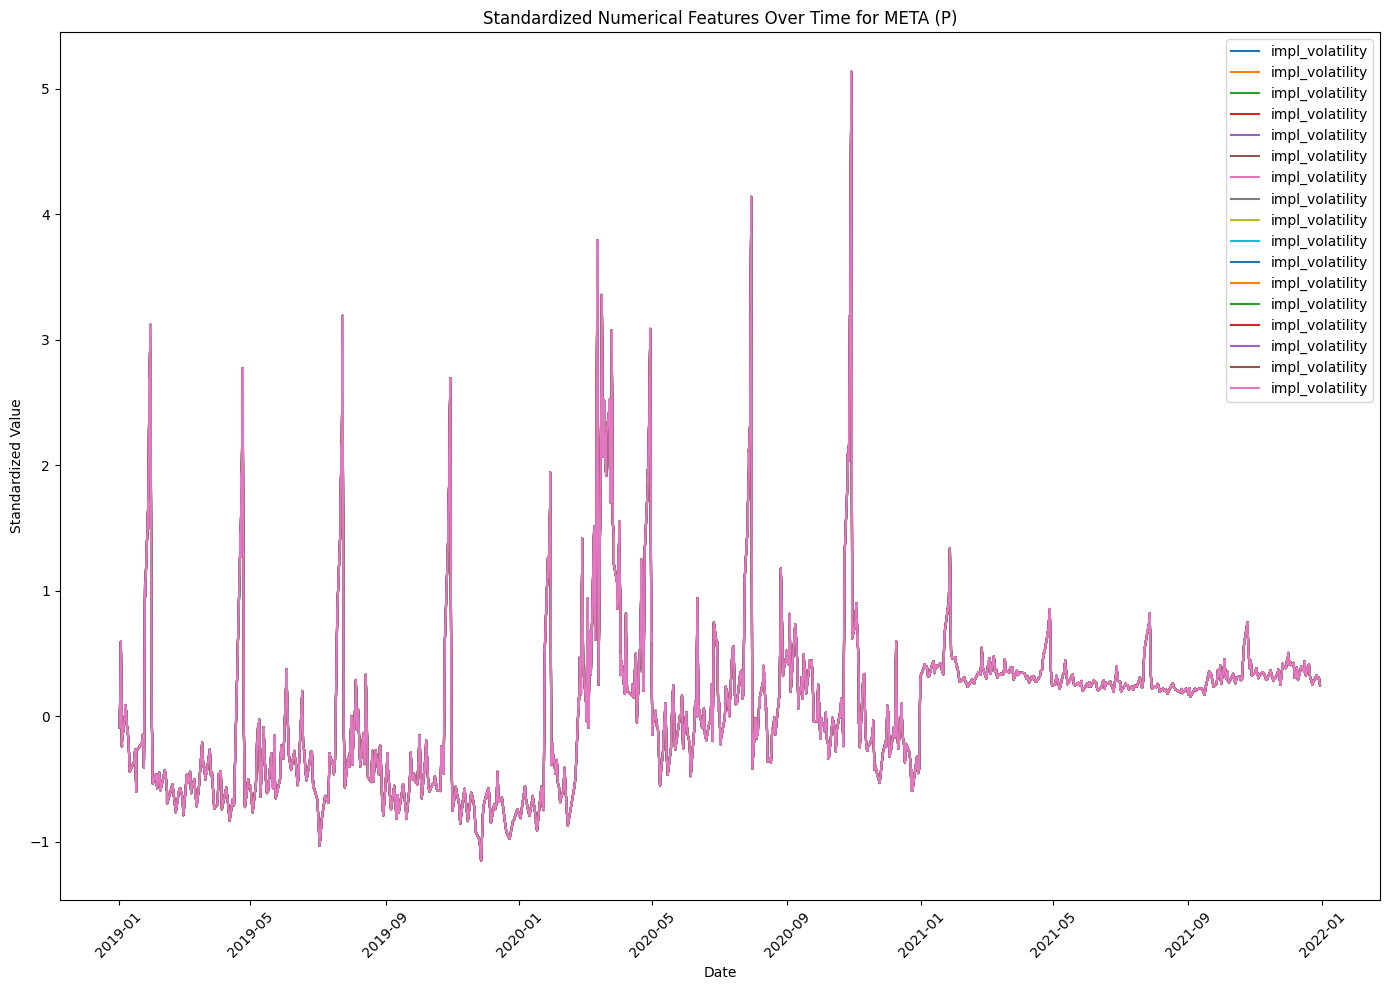

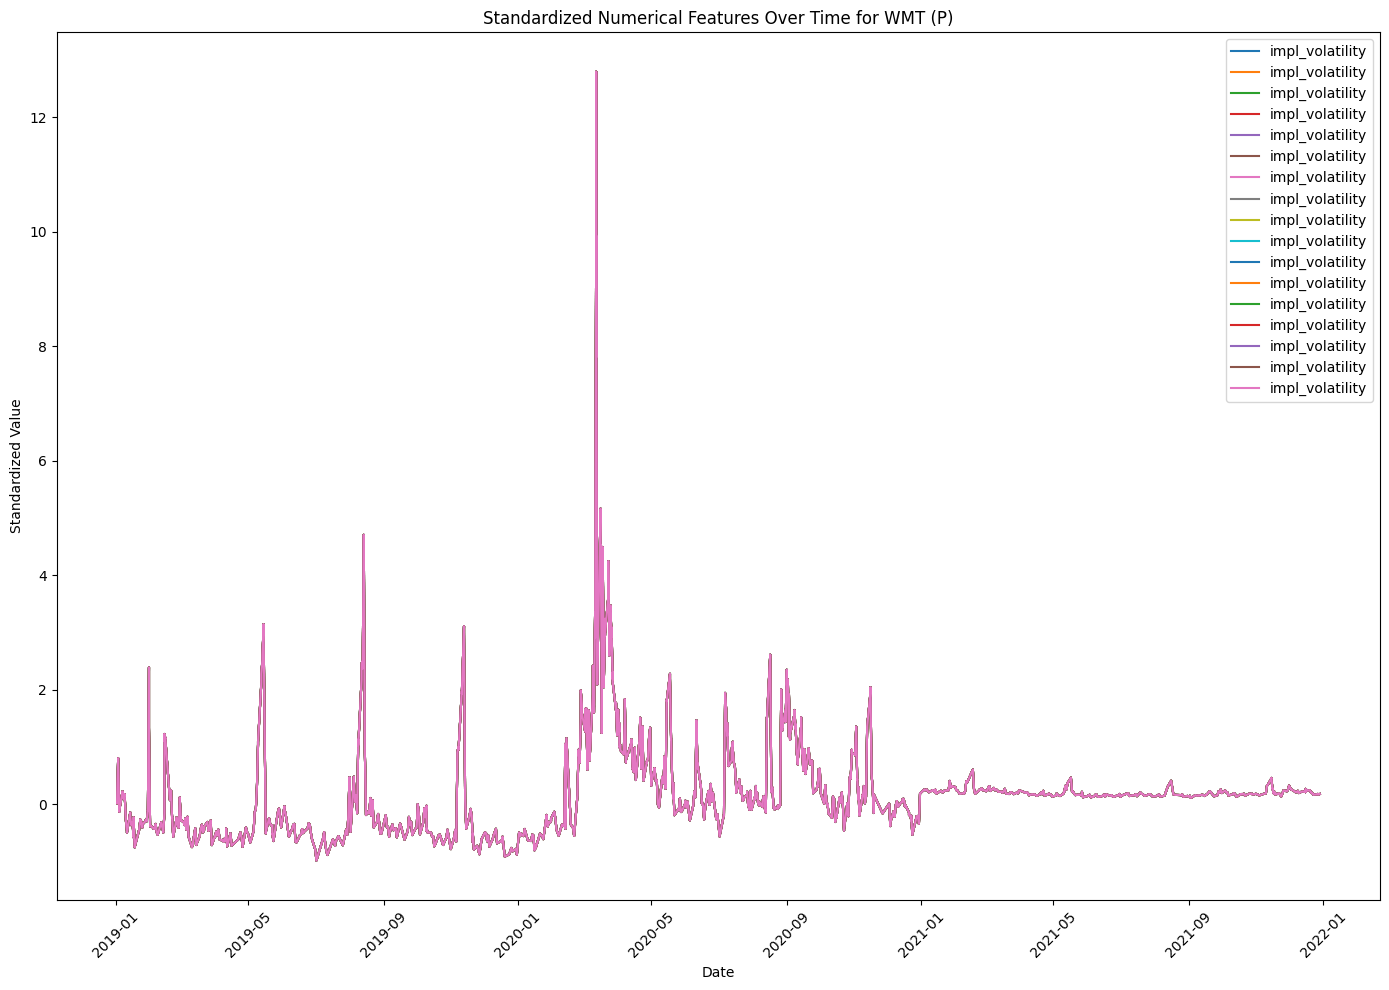

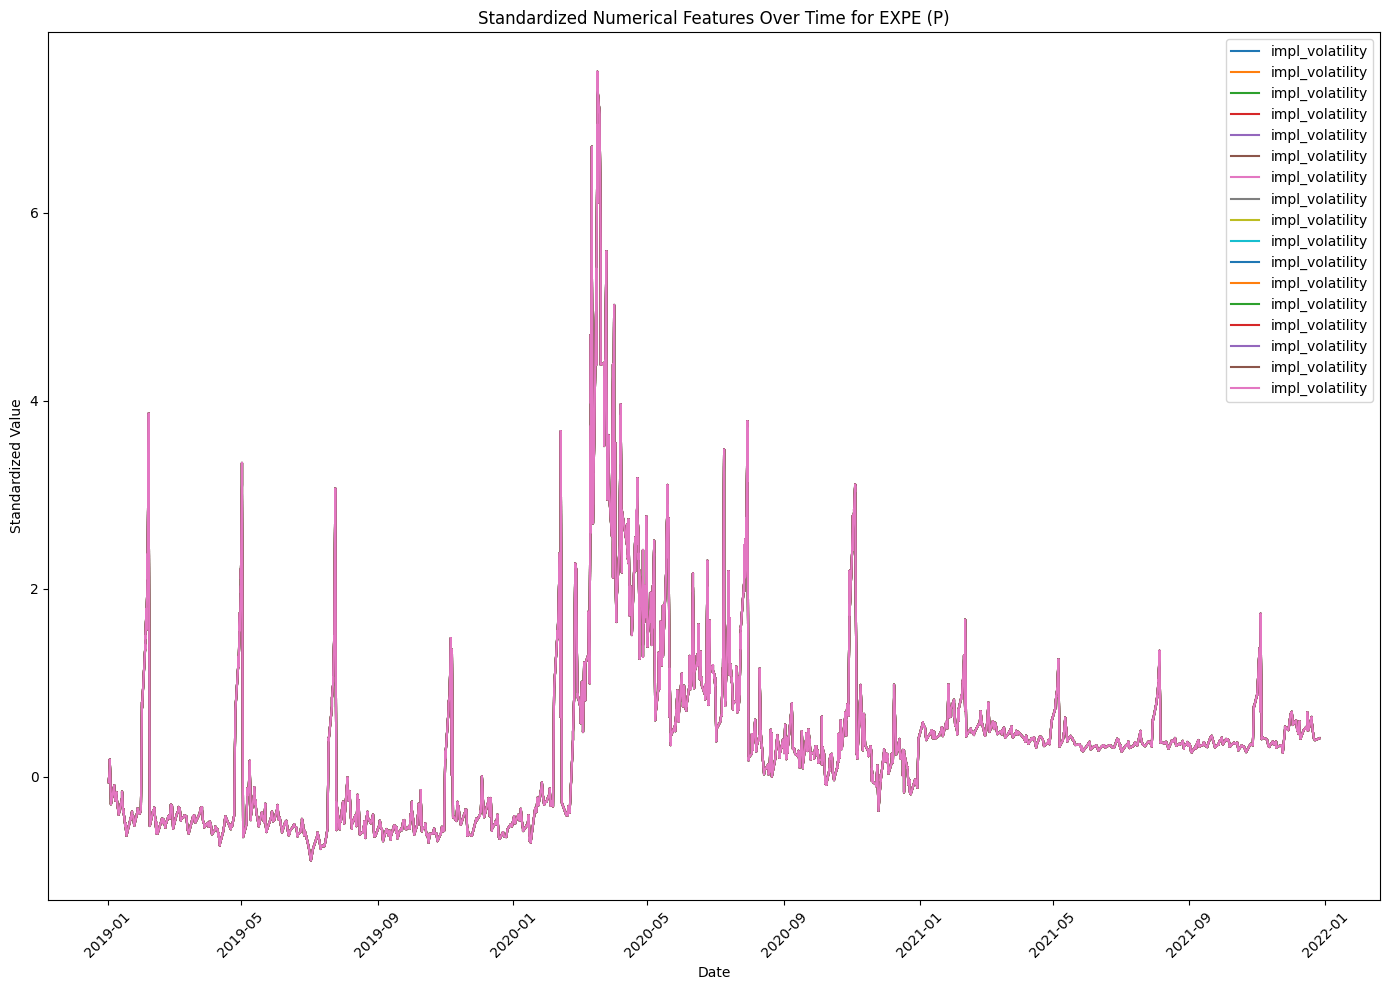

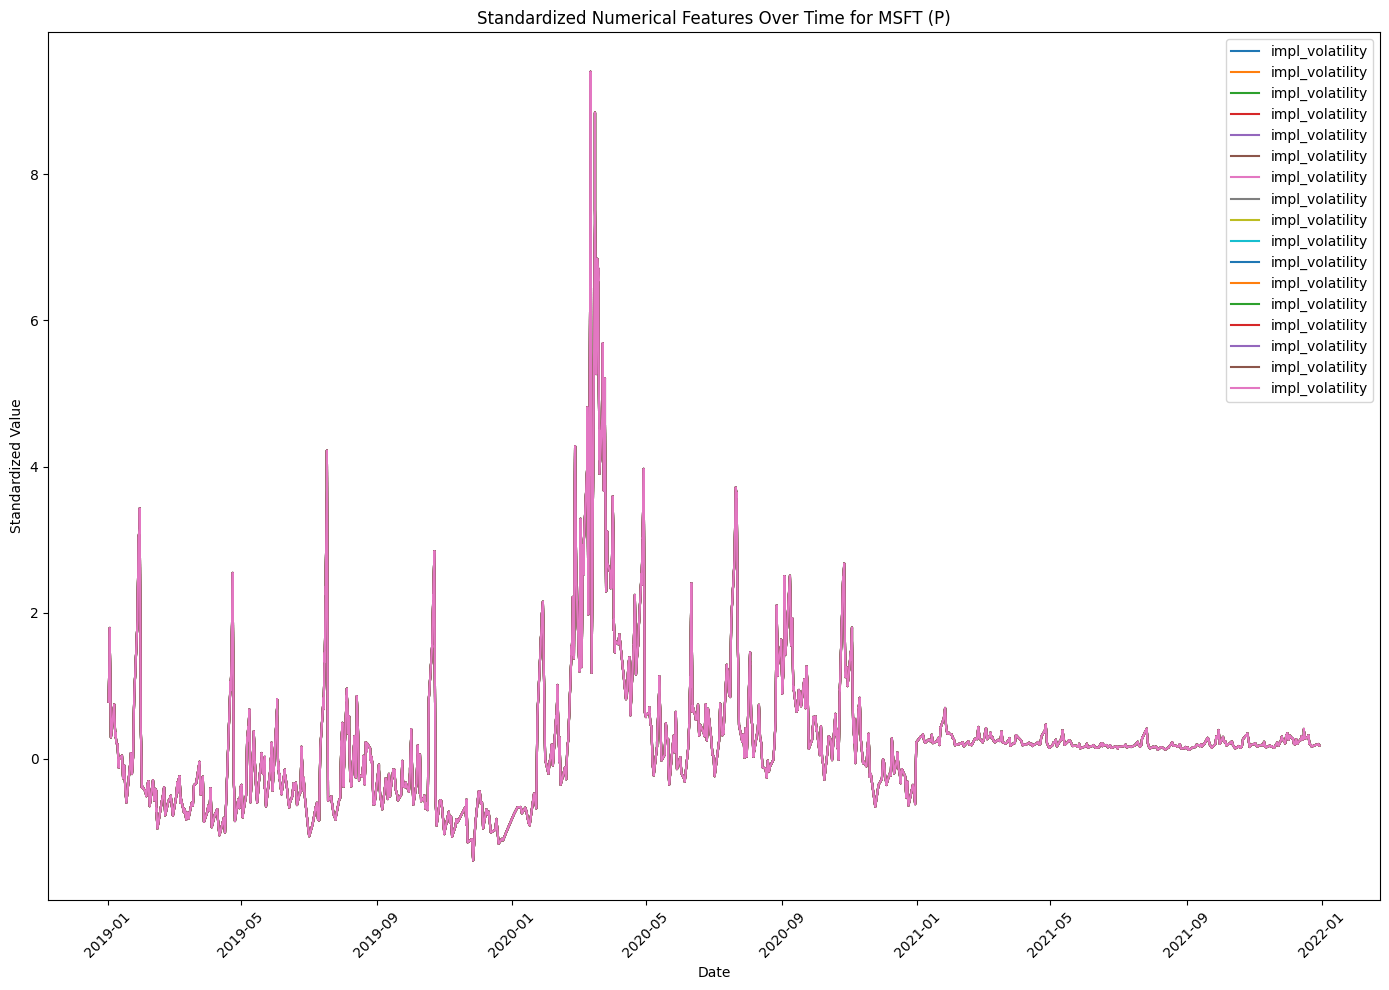

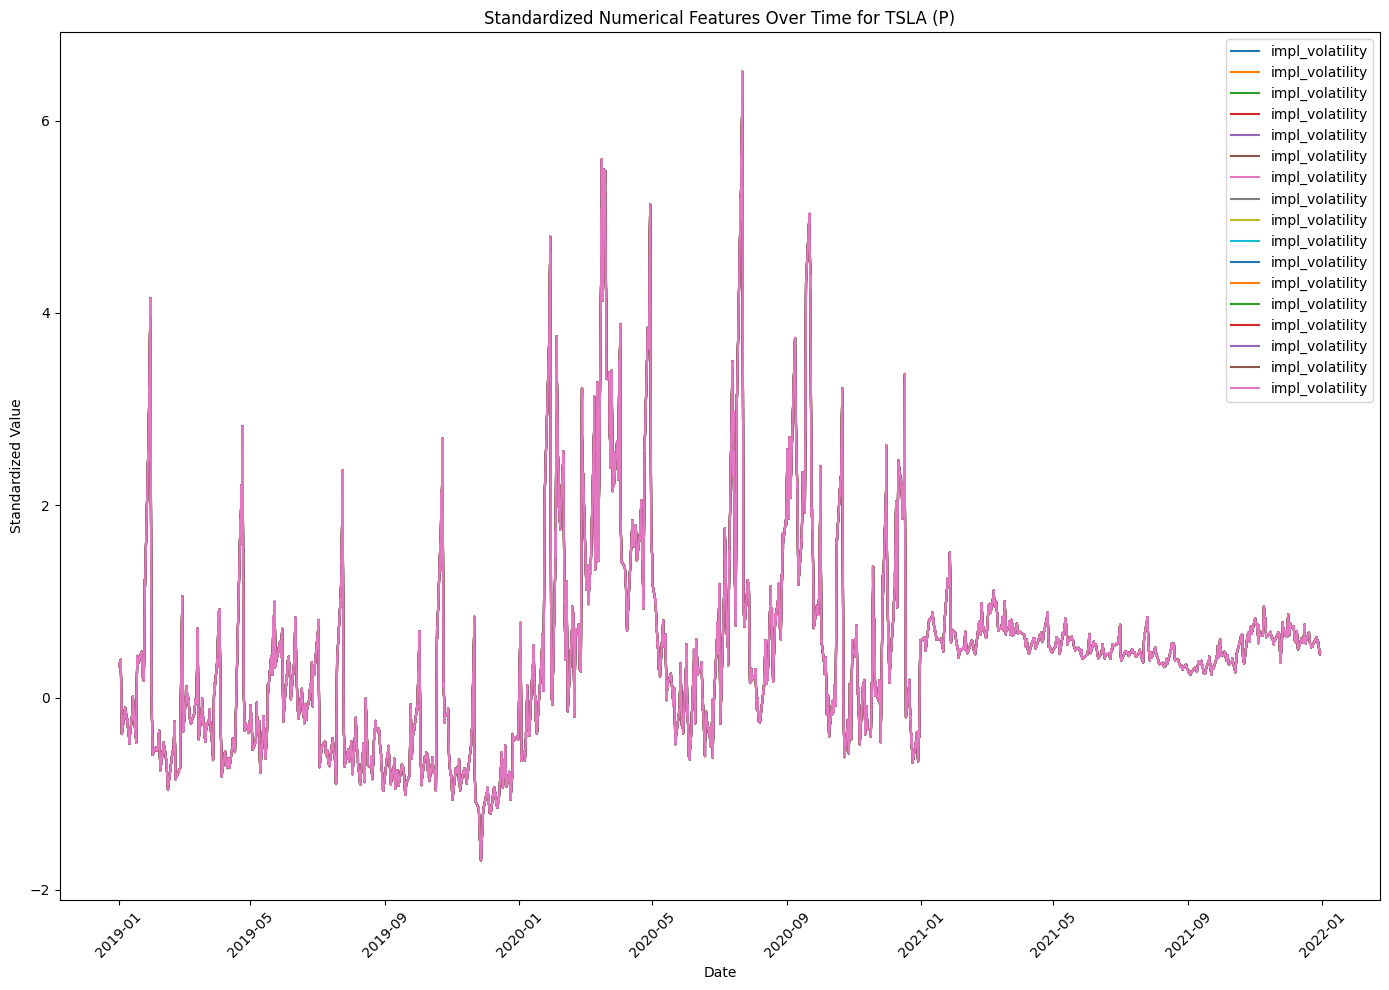

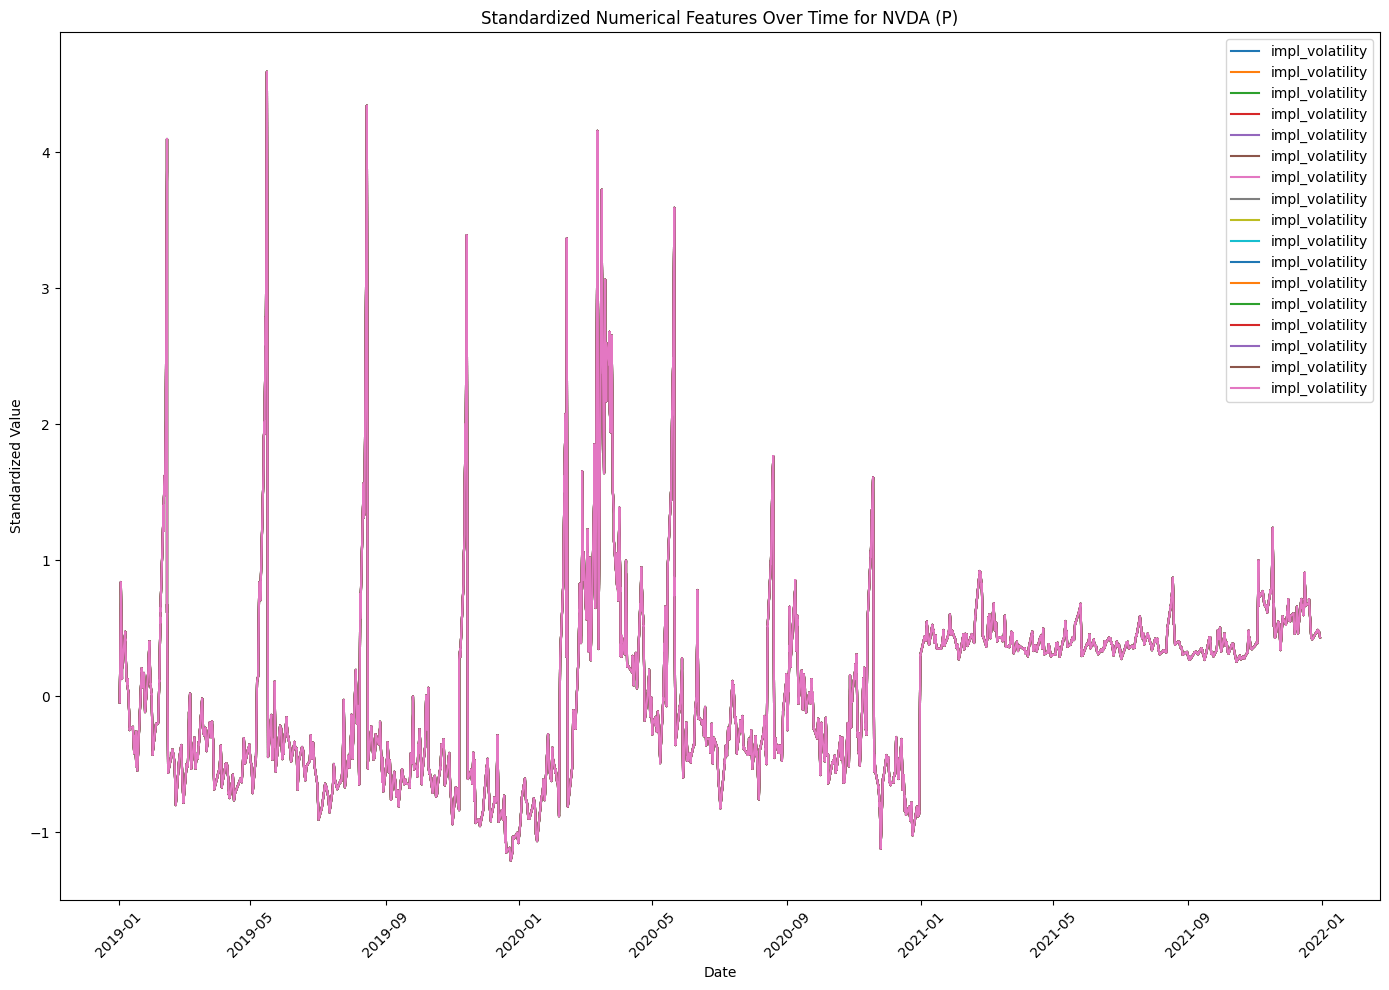

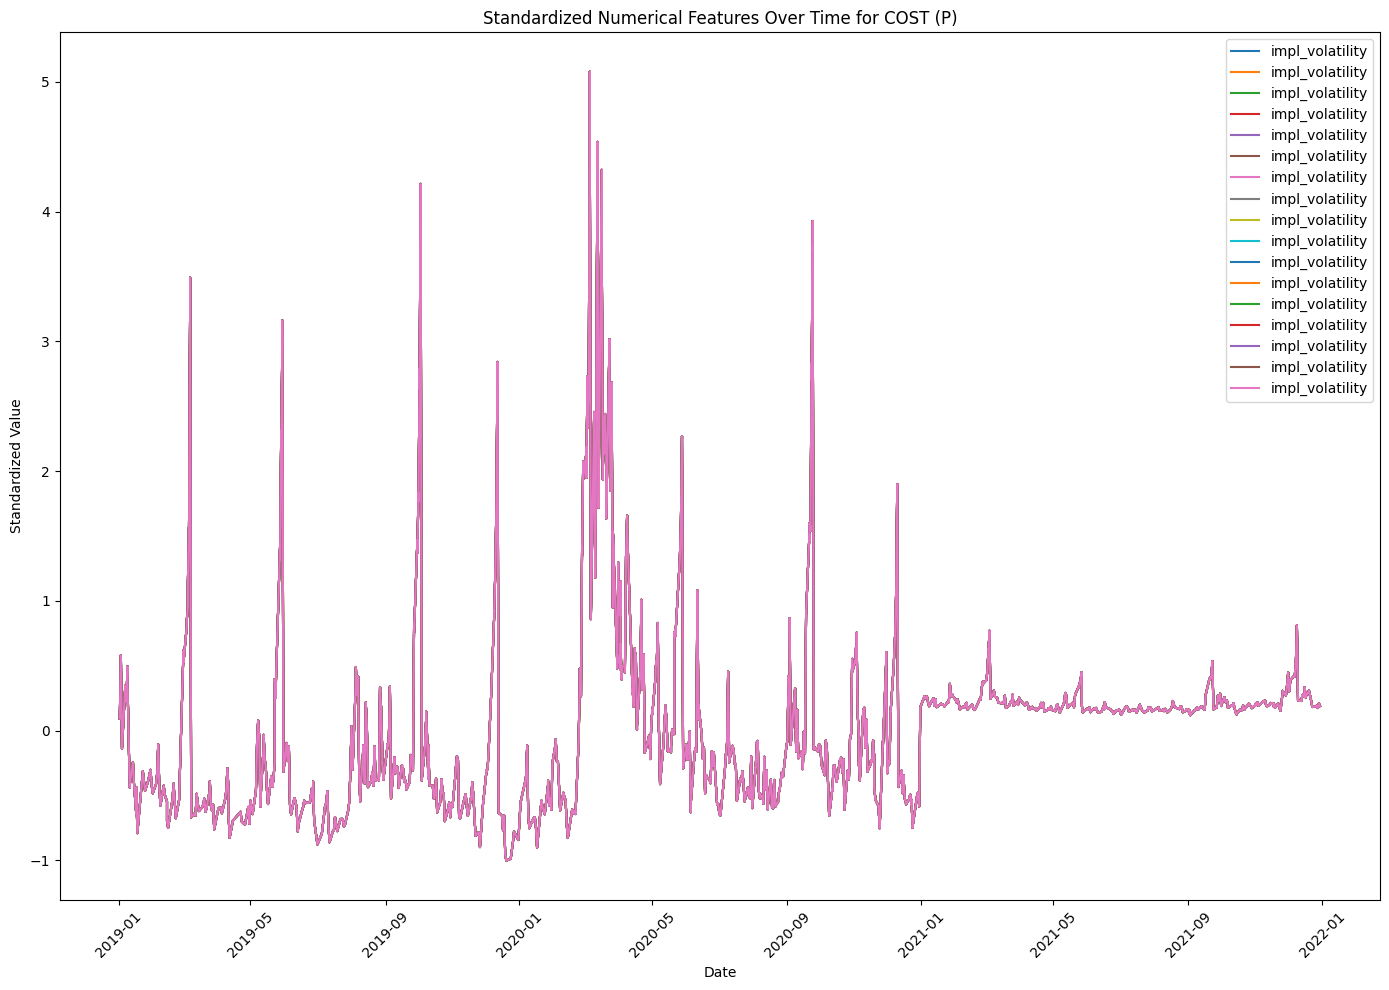

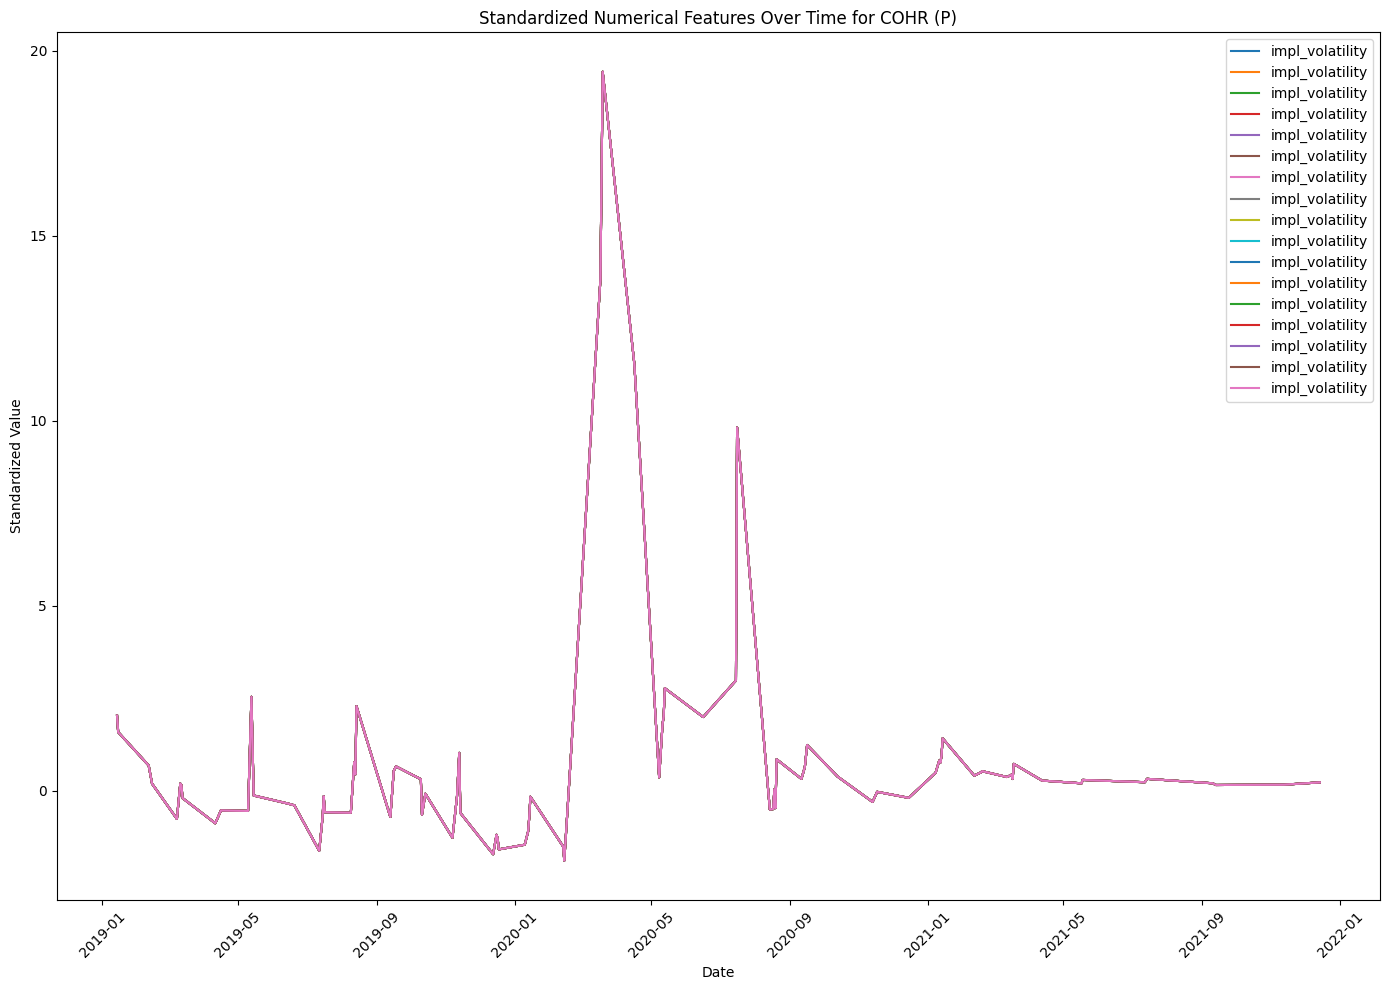

In [ ]:
# Get unique tickers
tickers = df_standardized['Ticker'].unique()

# Create a separate plot for each ticker
for ticker in tickers:
    # Select the rows for the current ticker where 'cp_flag' is 'P'
    df_ticker = df_standardized[(df_standardized['Ticker'] == ticker) & (df_standardized['cp_flag'] == 'C')]

    # If there are no rows for the current ticker with 'cp_flag' as 'P', skip to the next ticker
    if df_ticker.empty:
        continue

    # Create a new figure
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot each feature
    for feature in numerical_features:
        feature = "impl_volatility"
        ax.plot(df_ticker['date'], df_ticker[feature], label=feature)

    # Set the title and labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Standardized Value')
    ax.set_title(f'Standardized Numerical Features Over Time for {ticker} (P)')
    ax.legend()

    # Rotate the x-axis labels
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Display the DataFrame
    # import ace_tools as tools; tools.display_dataframe_to_user(name=f"Standardized DataFrame for {ticker} (P)", dataframe=df_ticker)

Means and standard deviations after standardization:
Permno: AMZN
Means:
strike_price             1.006498e+06
best_bid                 1.337952e+01
best_offer               1.379960e+01
volume                   6.377217e+02
open_interest            1.785696e+02
delta                   -2.645616e-02
gamma                   -4.042137e-01
vega                     3.869846e+01
theta                   -6.806559e+02
Prev_day_IV              2.862661e-01
PRC                      1.000907e+03
PRC_actual               5.304778e+01
impl_volatility          3.495073e-01
Annual_Dividend_Yield    0.000000e+00
2Y_bond                 -1.522725e+00
Forward_Price            1.000949e+03
atm_impl_volatility      3.383461e-01
dtype: float64
Standard Deviations:
strike_price             1.545024e+06
best_bid                 2.391272e+01
best_offer               2.462031e+01
volume                   2.531195e+03
open_interest            5.744573e+02
delta                    8.825806e-01
gamma            

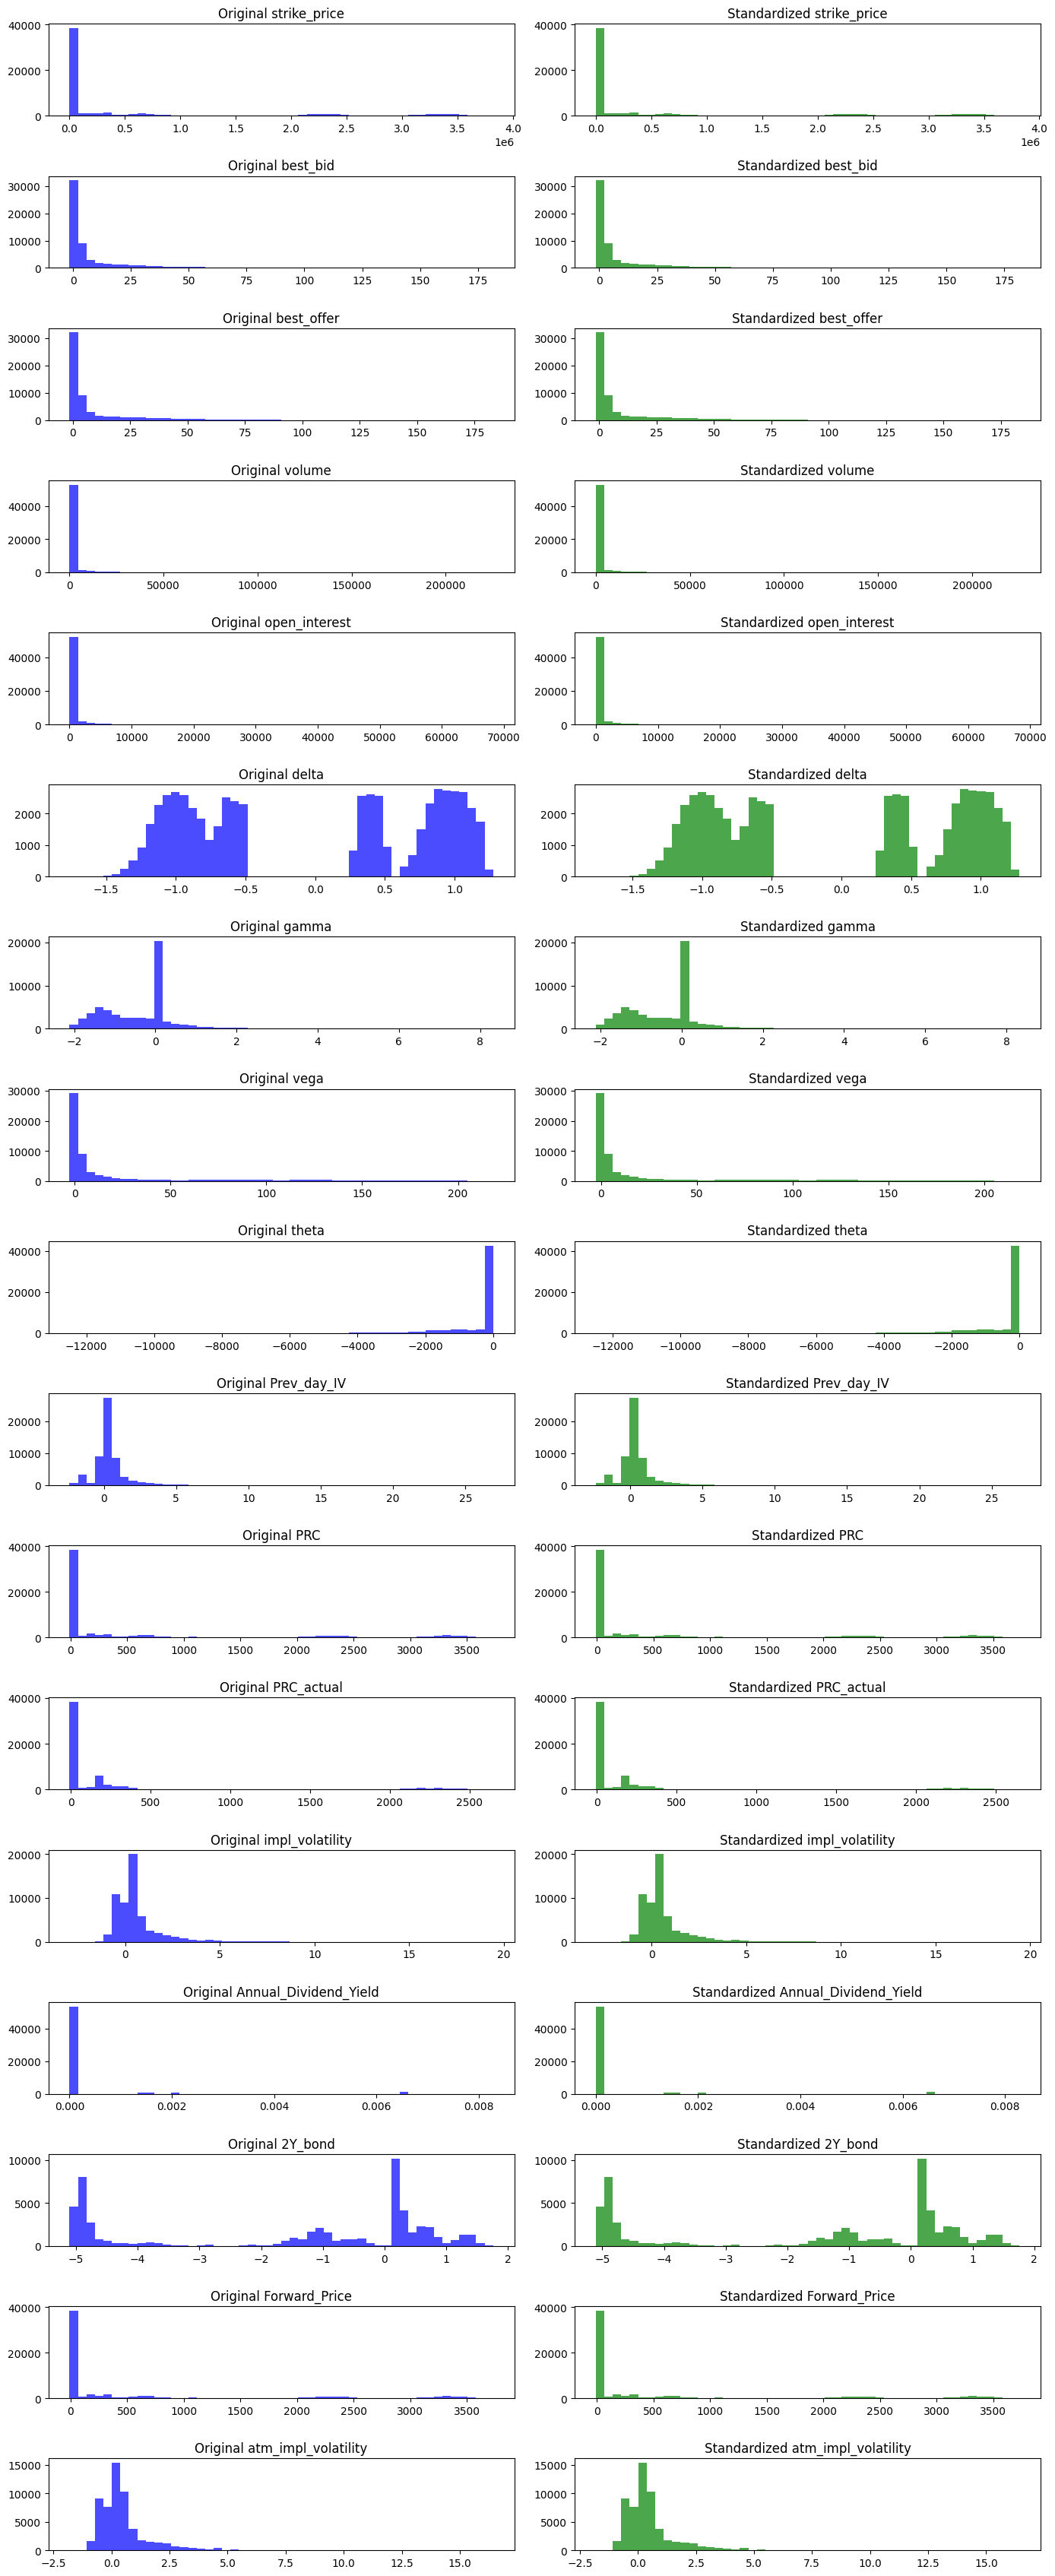

In [ ]:
# Check means and standard deviations
print("Means and standard deviations after standardization:")
for permno in df_standardized['Ticker'].unique():
    permno_data = df_standardized[df_standardized['Ticker'] == permno][numerical_features]
    means = permno_data.mean()
    stds = permno_data.std()
    print(f"Permno: {permno}")
    print("Means:")
    print(means)
    print("Standard Deviations:")
    print(stds)

# Plotting histograms before and after standardization for visual inspection
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 2*len(numerical_features)))
for i, feature in enumerate(numerical_features):
    # Original data
    axes[i, 0].hist(df[feature], bins=50, color='blue', alpha=0.7)
    axes[i, 0].set_title(f"Original {feature}")
    
    # Standardized data
    axes[i, 1].hist(df_standardized[feature], bins=50, color='green', alpha=0.7)
    axes[i, 1].set_title(f"Standardized {feature}")

plt.tight_layout()
plt.show()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Standardized DataFrame", dataframe=df_standardized)

In [ ]:
df_standardized

date     exdate cp_flag  strike_price   best_bid  best_offer  \
3441    2019-01-02 2019-01-04       P -2.394534e+00   0.048128    0.051704   
3442    2019-01-02 2019-01-04       C -2.394534e+00  -0.268720   -0.264386   
3443    2019-01-02 2019-01-04       P -2.417696e+00  -0.036801   -0.056852   
3444    2019-01-02 2019-01-04       C -2.417696e+00  -0.193591   -0.187758   
3704    2019-01-02 2019-01-04       C -2.371373e+00  -0.343849   -0.341014   
...            ...        ...     ...           ...        ...         ...   
5307341 2021-12-30 2021-12-31       P  1.075000e+06  12.600000   13.300000   
5307359 2021-12-30 2021-12-31       C  1.080000e+06   6.100000    6.200000   
5307360 2021-12-30 2021-12-31       P  1.080000e+06  16.000000   16.650000   
5307361 2021-12-30 2021-12-31       C  1.085000e+06   4.800000    5.000000   
5307391 2021-12-30 2021-12-31       P  1.085000e+06  19.500000   20.000000   

               volume  open_interest  impl_volatility     delta  ...  \
3441        -0.556636      -0.610924         0.748571 -0.804072  ...   
3442        -0.388431      -0.545414         0.564624  1.168038  ...   
3443         0.550309      -0.278806         0.727515 -0.768419  ...   
3444         1.599584       0.333631         0.562326  1.206924  ...   
3704         0.359677      -0.371738         0.561658  1.129153  ...   
...               ...            ...              ...       ...  ...   
5307341  16670.000000    1473.000000         0.467151 -0.565470  ...   
5307359  56094.000000    4315.000000         0.456935  0.358350  ...   
5307360  27037.000000    4423.000000         0.482176 -0.634093  ...   
5307361  18981.000000    2890.000000         0.473730  0.296189  ...   
5307391  13610.000000    2016.000000         0.484272 -0.699636  ...   

         Annual_Dividend_Yield         T       DATE  2Y_bond  Forward_Price  \
3441                       0.0  0.007937 2019-01-02  1.27978      -2.290612   
3442                       0.0  0.007937 2019-01-02  1.27978      -2.290612   
3443                       0.0  0.007937 2019-01-02  1.27978      -2.290612   
3444                       0.0  0.007937 2019-01-02  1.27978      -2.290612   
3704                       0.0  0.007937 2019-01-02  1.27978      -2.290612   
...                        ...       ...        ...      ...            ...   
5307341                    0.0  0.003968 2021-12-30  0.80760    1070.374272   
5307359                    0.0  0.003968 2021-12-30  0.80760    1070.374272   
5307360                    0.0  0.003968 2021-12-30  0.80760    1070.374272   
5307361                    0.0  0.003968 2021-12-30  0.80760    1070.374272   
5307391                    0.0  0.003968 2021-12-30  0.80760    1070.374272   

         atm_impl_volatility  moneyness  trading_day  maturity_group  \
3441                0.507851   0.050266            1           τ ≤ 5   
3442                0.507851   0.050266            1           τ ≤ 5   
3443                0.507851   0.009196            1           τ ≤ 5   
3444                0.507851   0.009196            1           τ ≤ 5   
3704                0.507851   0.091270            1           τ ≤ 5   
...                      ...        ...          ...             ...   
5307341             0.448418   0.152660          756           τ ≤ 5   
5307359             0.448418   0.316935          756           τ ≤ 5   
5307360             0.448418   0.316935          756           τ ≤ 5   
5307361             0.448418   0.480451          756           τ ≤ 5   
5307391             0.448418   0.480451          756           τ ≤ 5   

          m_category  
3441     0 < m ≤ 0.5  
3442     0 < m ≤ 0.5  
3443     0 < m ≤ 0.5  
3444     0 < m ≤ 0.5  
3704     0 < m ≤ 0.5  
...              ...  
5307341  0 < m ≤ 0.5  
5307359  0 < m ≤ 0.5  
5307360  0 < m ≤ 0.5  
5307361  0 < m ≤ 0.5  
5307391  0 < m ≤ 0.5  

[56844 rows x 29 columns]

In [ ]:
print(data.columns)

Index(['date', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer',
       'volume', 'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega',
       'theta', 'Ticker', 'Prev_day_IV', 'trading_days_till_exp', 'PRC',
       'PRC_actual', 'Year', 'Annual_Dividend_Yield', 'T', 'DATE', '2Y_bond',
       'Forward_Price', 'atm_impl_volatility', 'moneyness', 'trading_day',
       'maturity_group', 'm_category'],
      dtype='object')
